# Projekt z predmetu Machine Learning: Predikcia cien vozidiel BMW

**Autor:** Obmetko Veronika

**Dataset:** BMW Used Car Sales (UK Market)

### Ciele projektu:
1. Exploratívna analýza dát (EDA) a vizualizácia.
2. Čistenie dát (odstránenie odľahlých hodnôt a duplikátov).
3. Trénovanie ML modelov (Linear Regression vs Random Forest).
4. Porovnanie výkonnosti modelov.

### 🇸🇰 Úvod
Cieľom tohto projektu je vytvoriť a porovnať viacero modelov strojového učenia, ktoré dokážu predikovať cenu ojazdených vozidiel BMW na základe technických parametrov a ďalších charakteristík. Presný odhad trhovej hodnoty automobilu má významný praktický dopad — využíva sa pri rozhodovaní o kúpe či predaji, pri oceňovaní vozidiel pre poisťovne aj leasingové spoločnosti.

BMW predstavuje značku s veľkým rozsahom modelov, výraznou diverzitou a dostupnosťou dát. Projekt sa zameriava nielen na predikciu ceny, ale aj na identifikáciu faktorov, ktoré najviac ovplyvňujú hodnotu vozidla. Práca je rozdelená do logických etáp: analýza a čistenie dát, vizualizácia (EDA), príprava premenných, tréning modelov, ich porovnanie a finálna interpretácia výsledkov.

---

### 🇬🇧 Introduction
The objective of this project is to develop and compare several machine learning models capable of predicting the price of used BMW vehicles based on technical specifications and additional features. Accurate valuation of used cars plays an important role in decision-making for buyers, sellers, insurance companies, and leasing agencies.

BMW was chosen due to its wide range of models, well-structured lineup, and availability of high-quality public datasets. The project focuses not only on predicting the price but also on identifying which factors have the strongest influence on vehicle value. The workflow includes data cleaning, exploratory data analysis (EDA), feature engineering, model training, model comparison, and interpretation of results.

In [23]:
from IPython.display import display, HTML
style = """
<style>
    .container { width: 95% !important; }
    .output_subarea { max-width: 100% !important; }

    .text_cell_render {
        font-family: 'Georgia', 'Times New Roman', serif !important;
        font-size: 12pt !important;
        line-height: 1.6 !important;
        text-align: justify !important;
        color: #000000 !important;
    }

    .text_cell_render p {
        text-indent: 30px !important;
        margin-bottom: 10px !important;
    }

    h1, h2, h3 {
        font-family: 'Arial', sans-serif !important;
        color: #2c3e50 !important;
        margin-top: 20px !important;
        text-indent: 0px !important;
    }
</style>
"""
display(HTML(style))

import warnings
warnings.filterwarnings('ignore')

# 1. Úvod a Exploratívna analýza dát (EDA)

### 🇸🇰 1.1 Načítanie dát a príprava prostredia
V prvom kroku importujeme potrebné knižnice:
* **Pandas & NumPy:** Na manipuláciu s tabuľkovými dátami.
* **Matplotlib & Seaborn:** Na vizualizáciu a tvorbu grafov.
* **Scikit-learn:** Na tvorbu modelov strojového učenia.

Následne načítame dataset `bmw.csv` a zobrazíme prvé riadky, aby sme pochopili štruktúru dát (stĺpce ako *model, rok, cena, nájazd*).

---
### 🇬🇧 1.1 Data Loading and Environment Setup
In the first step, we import necessary libraries:
* **Pandas & NumPy:** For data manipulation.
* **Matplotlib & Seaborn:** For visualization.
* **Scikit-learn:** For building machine learning models.

Next, we load the `bmw.csv` dataset and display the first few rows to understand the data structure (columns such as *model, year, price, mileage*).

Prvých 5 riadkov datasetu:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


--- DÁTA PRED ČISTENÍM (HĽADÁME ODĽAHLÉ HODNOTY) ---


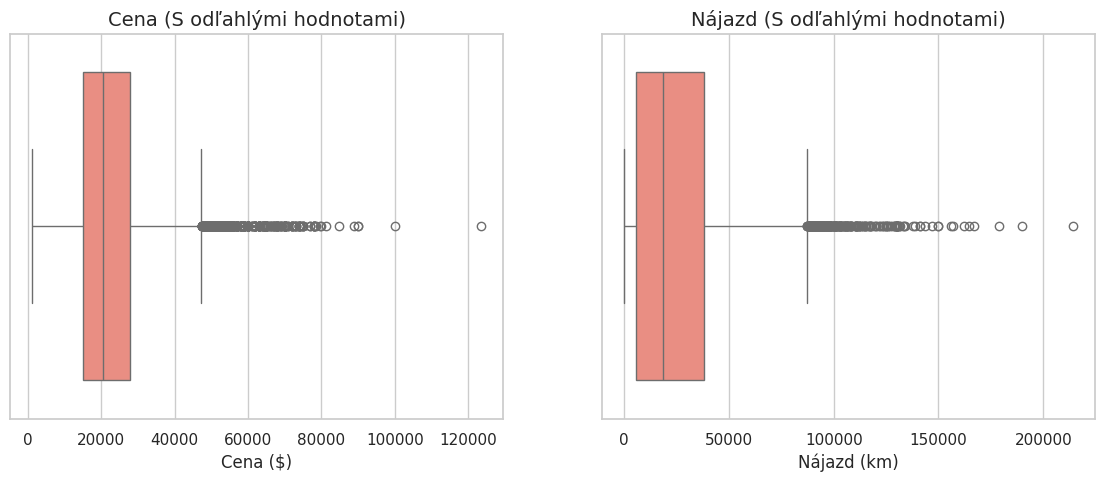

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML knižnice
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Nastavenie vizuálneho štýlu grafov (aby boli pekné pre prezentáciu)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Načítanie dát (Load Data)
path = "/content/bmw.csv"  # Skontrolujte cestu k súboru!
df = pd.read_csv(path)

print("Prvých 5 riadkov datasetu:")
display(df.head())  # display() robí krajšiu tabuľku ako print()

# ==========================================
# 1.1 VIZUALIZÁCIA PRED ČISTENÍM (Initial Boxplots)
# ==========================================
print("--- DÁTA PRED ČISTENÍM (HĽADÁME ODĽAHLÉ HODNOTY) ---")

plt.figure(figsize=(14, 5))

# Graf ceny s odľahlými hodnotami
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'], color='salmon')
plt.title('Cena (S odľahlými hodnotami)', fontsize=14)
plt.xlabel('Cena ($)')

# Graf nájazdu s odľahlými hodnotami
plt.subplot(1, 2, 2)
sns.boxplot(x=df['mileage'], color='salmon')
plt.title('Nájazd (S odľahlými hodnotami)', fontsize=14)
plt.xlabel('Nájazd (km)')

plt.show()

### 🇸🇰 Interpretácia prvotnej analýzy

**1. Ukážka dát (`head`):**
Vidíme, že dataset obsahuje textové premenné (napr. `fuelType`, `transmission`), ktoré budeme musieť neskôr premeniť na čísla (Encoding).

**2. Analýza odľahlých hodnôt (Boxplots):**
Grafy nám okamžite ukazujú problémy v dátach, ktoré musíme vyriešiť:
* **Cena (Price):** Vidíme veľa čiernych bodov napravo od "krabice". To sú **odľahlé hodnoty (outliers)** – extrémne drahé autá (pravdepodobne športové modely alebo limuzíny), ktoré sa vymykajú bežnému trhu.
* **Nájazd (Mileage):** Podobne vidíme autá s extrémne vysokým nájazdom (nad 200 000 km).

**Záver:** Pred trénovaním modelu musíme tieto extrémy odstrániť, aby nezhoršovali presnosť predikcie.

---
### 🇬🇧 Initial Analysis Interpretation

**1. Data Preview (`head`):**
We see that the dataset contains categorical variables (e.g., `fuelType`, `transmission`) that will need to be converted into numbers later (Encoding).

**2. Outlier Analysis (Boxplots):**
The plots immediately reveal data issues we need to address:
* **Price:** We see many black dots to the right of the box. These are **outliers** – extremely expensive cars (likely sports models or limousines) that deviate from the standard market.
* **Mileage:** Similarly, we see cars with extremely high mileage (over 200,000 km).

**Conclusion:** Before training the model, we must remove these extremes to avoid negatively affecting prediction accuracy.

--- 1. KONTROLA DÁT (MISSING VALUES) ---
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


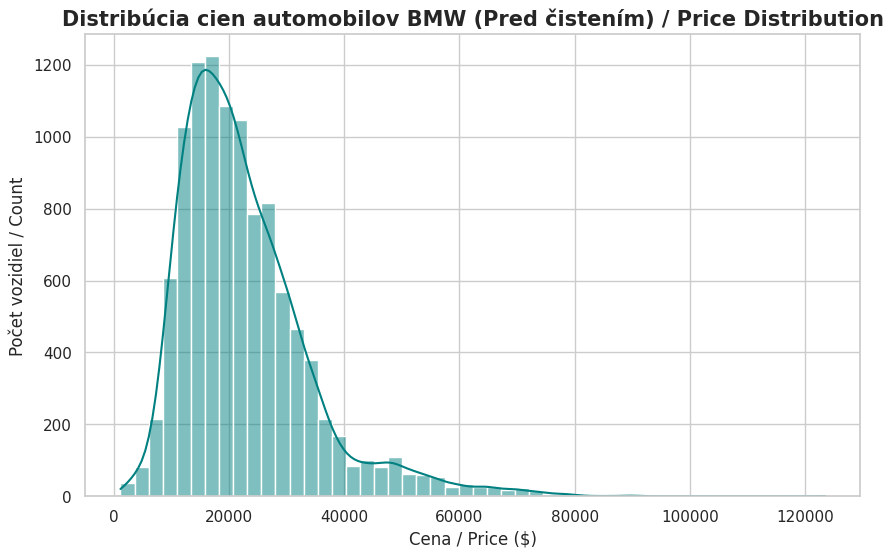

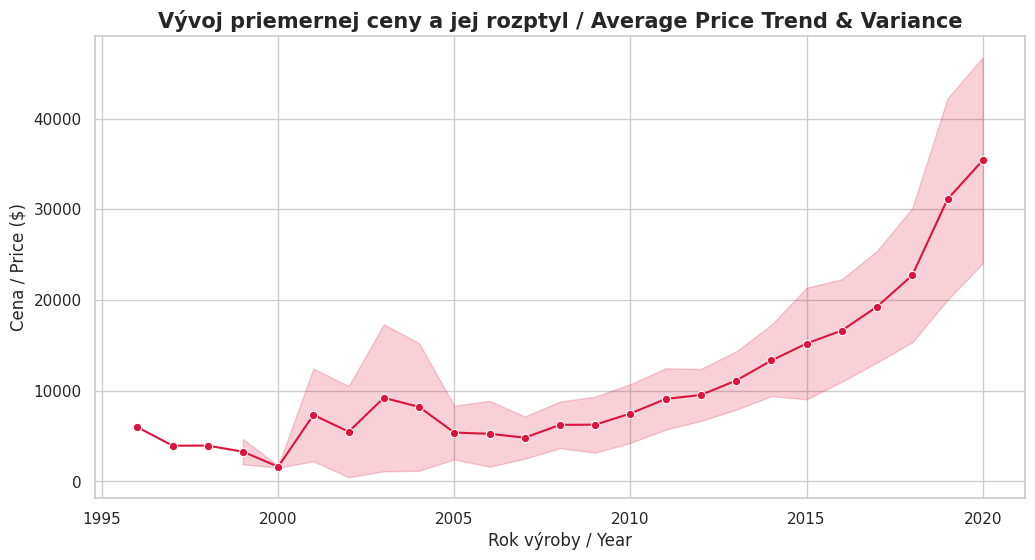

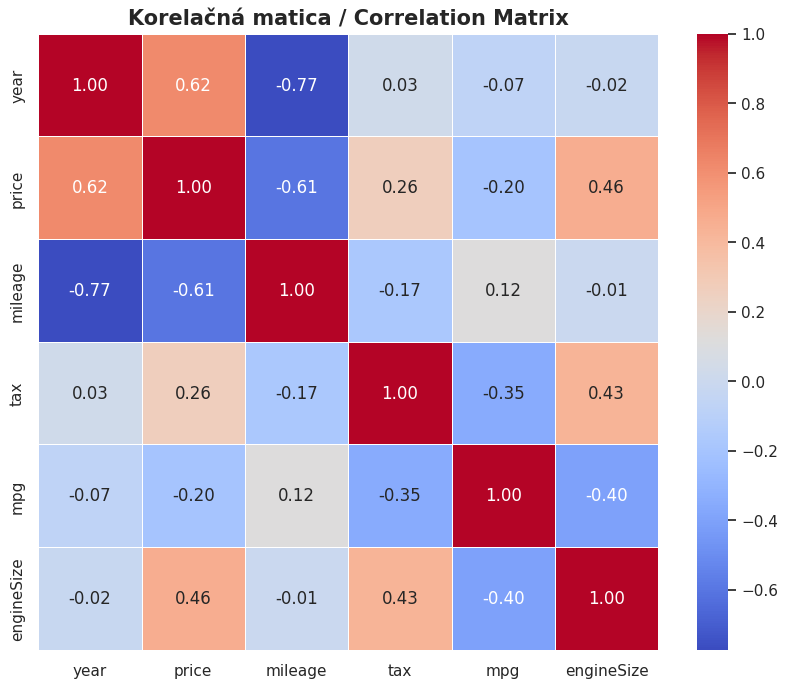

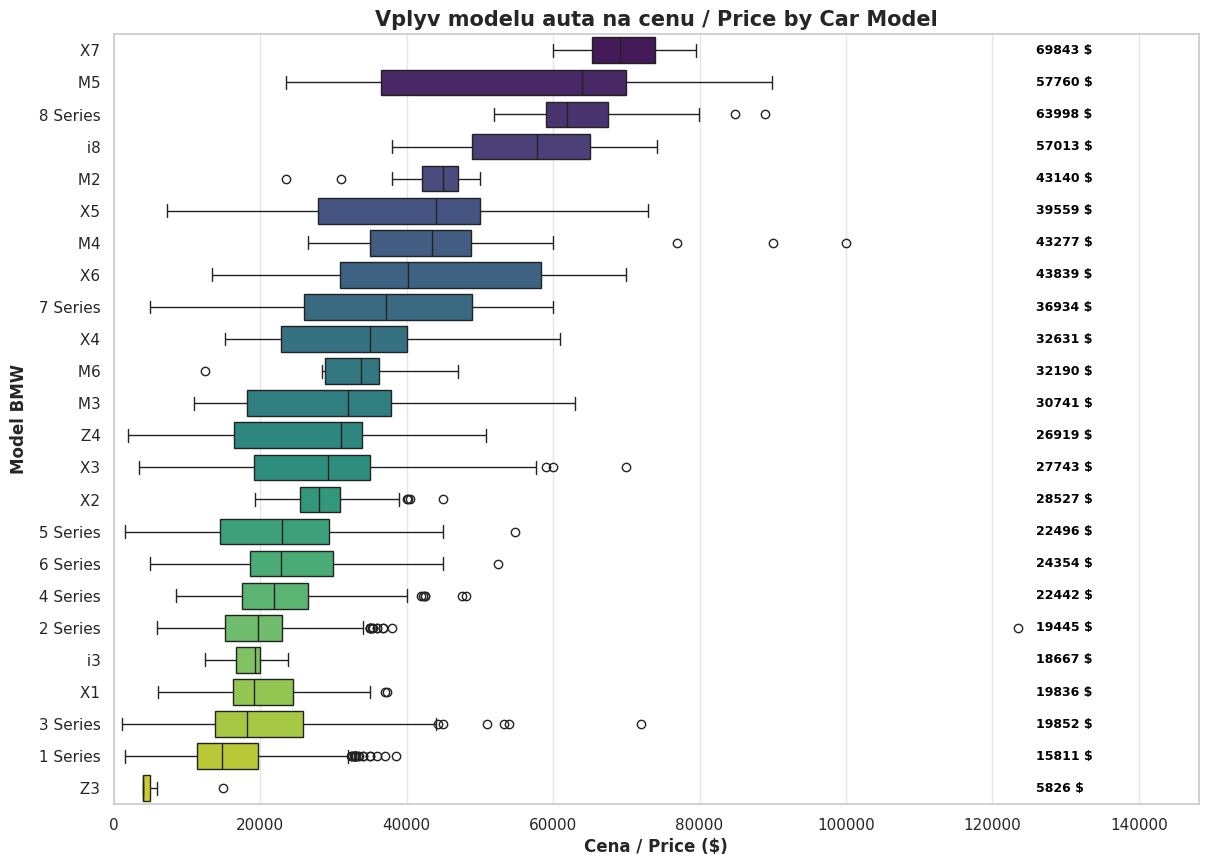


--- ZÁVER Z GRAFU / CONCLUSION ---
Najdrahší / Most Expensive:  X7 (69843 $)
Najlacnejší / Cheapest:  Z3 (5826 $)
Rozdiel / Ratio: 12.0x


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Nastavenie dizajnu grafov / Chart styling
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. KONTROLA CHÝBAJÚCICH HODNÔT / MISSING VALUES CHECK
print("--- 1. KONTROLA DÁT (MISSING VALUES) ---")
print(df.isnull().sum())

# 2. DISTRIBÚCIA CIEN / PRICE DISTRIBUTION (HISTOGRAM)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='teal')
plt.title('Distribúcia cien automobilov BMW (Pred čistením) / Price Distribution', fontsize=15, fontweight='bold')
plt.xlabel('Cena / Price ($)')
plt.ylabel('Počet vozidiel / Count')
plt.show()

# 3. VÝVOJ CENY V ČASE / PRICE TREND OVER TIME
plt.figure(figsize=(12, 6))
# errorbar='sd' ukazuje smerodajnú odchýlku / shows standard deviation
sns.lineplot(data=df, x='year', y='price', errorbar='sd', marker='o', color='crimson')
plt.title('Vývoj priemernej ceny a jej rozptyl / Average Price Trend & Variance', fontsize=15, fontweight='bold')
plt.xlabel('Rok výroby / Year')
plt.ylabel('Cena / Price ($)')
plt.grid(True)
plt.show()

# 4. KORELAČNÁ MATICA / CORRELATION MATRIX (HEATMAP)
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelačná matica / Correlation Matrix', fontsize=15, fontweight='bold')
plt.show()

# 5. VPLYV MODELU NA CENU / MODEL IMPACT ON PRICE (BOXPLOT)
# Zoradenie modelov podľa mediánu / Sort models by median price
sorted_models = df.groupby('model')['price'].median().sort_values(ascending=False).index

plt.figure(figsize=(14, 10))
ax = sns.boxplot(
    data=df,
    x='price',
    y='model',
    order=sorted_models,
    palette='viridis'
)

plt.title('Vplyv modelu auta na cenu / Price by Car Model', fontsize=15, fontweight='bold')
plt.xlabel('Cena / Price ($)', fontsize=12, fontweight='bold')
plt.ylabel('Model BMW', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.5)

# --- Pridanie textových popisov (priemerná cena) / Adding text labels (mean price) ---
means = df.groupby('model')['price'].mean().loc[sorted_models]
max_val = df['price'].max()

for y_pos, value in enumerate(means):
    ax.text(
        max_val * 1.02,   # posun doprava / shift right
        y_pos,
        f"{value:.0f} $",
        va='center',
        ha='left',
        fontsize=9,
        color='black',
        fontweight='bold'
    )

plt.xlim(0, max_val * 1.20) # Zväčšíme graf pre text / Expand limits for text
plt.show()

# Výpočet rozdielov / Calculating differences
top_model = means.idxmax()
bottom_model = means.idxmin()
ratio = means.max() / means.min()

print(f"\n--- ZÁVER Z GRAFU / CONCLUSION ---")
print(f"Najdrahší / Most Expensive: {top_model} ({means.max():.0f} $)")
print(f"Najlacnejší / Cheapest: {bottom_model} ({means.min():.0f} $)")
print(f"Rozdiel / Ratio: {ratio:.1f}x")

### 🇸🇰 1.2 Detailná analýza distribúcie a vzťahov
V tomto kroku sme sa zamerali na hlbšie pochopenie dát:

1.  **Chýbajúce hodnoty (Missing Values):**
    * Výstup príkazu `isnull().sum()` nám potvrdil, či sú dáta kompletné. Ak sú všade nuly, dataset je kvalitný a nemusíme dopĺňať prázdne miesta.

2.  **Distribúcia cien (Histogram):**
    * Graf ukazuje, že ceny nie sú rozdelené rovnomerne. Vidíme **zošikmenie doprava (Right-skewed)**.
    * Väčšina áut sa predáva za nižšie ceny (masový trh), zatiaľ čo vpravo vidíme dlhý "chvost" drahých vozidiel.

3.  **Korelačná matica (Heatmap):**
    * Teplotná mapa odhaľuje silu vzťahov medzi premennými.
    * **Červená farba (Pozitívna korelácia):** Vidíme silný vzťah medzi `year` (rok) a `price` (cena). Čím je auto novšie, tým je drahšie.
    * **Modrá farba (Negatívna korelácia):** Vidíme vzťah medzi `mileage` (nájazd) a `price`. Čím viac kilometrov, tým nižšia cena.

4.  **Vývoj ceny v čase (Line Plot):**
    * Krivka jasne ukazuje, ako cena stúpa s rokom výroby.
    * **Tieňová oblasť (Rozptyl):** Všimnite si, že pri nových autách (vpravo) je tieň širší. To znamená, že nové autá majú veľké cenové rozdiely (základná výbava vs. prémiová). Pri starých autách (vľavo) sa ceny vyrovnávajú.

---
### 🇬🇧 1.2 Detailed Distribution and Relationship Analysis
In this step, we focused on a deeper understanding of the data:

1.  **Missing Values:**
    * The output of `isnull().sum()` confirmed whether the data is complete. If all values are zero, the dataset is of high quality, and no imputation is needed.

2.  **Price Distribution (Histogram):**
    * The chart shows that prices are not evenly distributed. We observe a **right-skewness**.
    * Most cars are sold at lower prices (mass market), while there is a long "tail" of expensive vehicles to the right.

3.  **Correlation Matrix (Heatmap):**
    * The heatmap reveals the strength of relationships between variables.
    * **Red (Positive Correlation):** We see a strong relationship between `year` and `price`. Newer cars are more expensive.
    * **Blue (Negative Correlation):** We see a relationship between `mileage` and `price`. Higher mileage leads to a lower price.

4.  **Price Evolution over Time (Line Plot):**
    * The curve clearly shows how price increases with the year of production.
    * **Shaded Area (Variance):** Note that for newer cars (right side), the shadow is wider. This indicates large price differences for new vehicles (basic vs. premium trim). For older cars (left side), prices tend to equalize.

In [ ]:
# ==========================================
# 2.5 ŠTATISTICKÁ ANALÝZA (VIF & P-VALUES)
# Statistical Analysis
# ==========================================
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split # Pre istotu / Just in case

# --- 1. TEST MULTIKOLINEARITY / MULTICOLLINEARITY TEST (VIF) ---
print("--- 1. VIF TEST (Variance Inflation Factor) ---")
print("Overujeme, či korelácia medzi 'year' a 'mileage' (-0.77) je kritická.")
print("Checking if correlation between 'year' and 'mileage' is critical.\n")

# Vyberieme len číselné premenné / Select numerical columns only
cols_to_check = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
# Použijeme df_clean (ak existuje) alebo df / Use df_clean or df
data_source = df_clean if 'df_clean' in locals() else df
X_vif = data_source[cols_to_check]

# Vytvoríme tabuľku VIF / Create VIF table
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

display(vif_data)
print("INTERPRETÁCIA / INTERPRETATION:")
print("Ak je VIF < 5, je to OK. Ak je VIF > 10, je to kritické.")
print("If VIF < 5, it's OK. If VIF > 10, it's critical.")


# --- 2. OLS REGRESSION REPORT (P-VALUES) ---
print("\n\n--- 2. OLS REPORT (P-Values & F-Statistic) ---")
print("Hľadáme štatistickú významnosť premenných (P < 0.05).")
print("Looking for statistical significance of variables.\n")

# Pripravíme dáta pre report / Prepare data for report
# Rýchly split len pre túto analýzu / Quick split for this analysis
X_temp = data_source[cols_to_check]
y_temp = data_source['price']
X_train_ols, _, y_train_ols, _ = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Pridáme konštantu pre Statsmodels / Add constant
X_train_sm = sm.add_constant(X_train_ols)

# Vytvoríme a natrénujeme model / Create and fit OLS model
ols_model = sm.OLS(y_train_ols, X_train_sm).fit()

# Výpis výsledkov / Print summary
print(ols_model.summary())

--- 1. VIF TEST (Variance Inflation Factor) ---
Overujeme, či korelácia medzi 'year' a 'mileage' (-0.77) je kritická.
Checking if correlation between 'year' and 'mileage' is critical.



,Feature,VIF
0,year,32.264323
1,mileage,2.117341
2,tax,7.388204
3,mpg,5.340591
4,engineSize,22.285839


INTERPRETÁCIA / INTERPRETATION:
Ak je VIF < 5, je to OK. Ak je VIF > 10, je to kritické.
If VIF < 5, it's OK. If VIF > 10, it's critical.


--- 2. OLS REPORT (P-Values & F-Statistic) ---
Hľadáme štatistickú významnosť premenných (P < 0.05).
Looking for statistical significance of variables.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     3231.
Date:                Thu, 27 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:10:24   Log-Likelihood:                -88262.
No. Observations:                8624   AIC:                         1.765e+05
Df Residuals:                    8618   BIC:                         1.766e+05
Df Model:                           5                                      

### 🇸🇰 Interpretácia štatistických testov

**1. Test Multikolinearity (VIF):**
Výsledky VIF testu ukázali vysoké hodnoty pre premenné `year` a `engineSize` (hodnoty výrazne nad 5).
* **Vysvetlenie:** To znamená, že tieto premenné sú silne závislé od ostatných (napr. novšie autá majú špecifické motory a nižší nájazd).
* **Rozhodnutie:** Napriek vysokej multikolinearite sme sa rozhodli premenné ponechať. Náš cieľový model (**Random Forest**) je voči tomuto javu odolný a dokáže z týchto informácií ťažiť, na rozdiel od Lineárnej regresie.

**2. OLS Regresný report:**
* **P-hodnoty (P>|t|):** Všetky analyzované premenné majú P-hodnotu **0.000**. To potvrdzuje, že všetky vybrané faktory (rok, nájazd, motor) majú **štatisticky významný vplyv** na cenu a nie sú v modeli náhodou.
* **Varovanie modelu:** Vysoké "Condition Number" v reporte potvrdzuje naše zistenia o multikolinearite, čo opäť argumentuje v prospech použitia komplexnejších modelov než je jednoduchá regresia.

---
### 🇬🇧 Statistical Interpretation

**1. Multicollinearity Test (VIF):**
VIF values for `year` and `engineSize` are high (> 5), indicating strong interdependence among variables.
* **Decision:** We decided to keep these variables. While this is problematic for Linear Regression, our target model (**Random Forest**) is robust to multicollinearity and can effectively use this data.

**2. OLS Regression Report:**
* **P-values:** All variables show a P-value of **0.000**, confirming their **statistical significance**. Every selected feature creates a meaningful impact on the price.
* **Warning:** The high "Condition Number" confirms strong multicollinearity, further justifying the need for non-linear models like Random Forest over simple regression.

In [ ]:
# ==========================================
# ANALÝZA ODĽAHLÝCH HODNÔT (OUTLIERS ANALYSIS)
# ==========================================

# --- 1. CENA (PRICE) ---
# Počítame IQR (Interquartile Range)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Určíme hranice
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Horná hranica ceny (Threshold): {upper_bound:.0f} $")

# Hľadáme autá, ktoré sú mimo hraníc (príliš drahé alebo lacné)
price_outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(f"Počet odľahlých hodnôt (Cena): {len(price_outliers)} vozidiel")

print("\n Top 10 najdrahších áut (Outliers), ktoré pravdepodobne odstránime:")
# display() vytvorí peknú formátovanú tabuľku namiesto obyčajného textu
display(price_outliers.sort_values(by='price', ascending=False).head(10))


# --- 2. NÁJAZD (MILEAGE) ---
# To isté pre kilometre
Q1_mil = df['mileage'].quantile(0.25)
Q3_mil = df['mileage'].quantile(0.75)
IQR_mil = Q3_mil - Q1_mil

upper_bound_mil = Q3_mil + 1.5 * IQR_mil

print(f"\n{'-'*50}")
print(f"Horná hranica nájazdu: {upper_bound_mil:.0f} km")

# Hľadáme autá s extrémnym nájazdom
mileage_outliers = df[df['mileage'] > upper_bound_mil]
print(f"Počet odľahlých hodnôt (Nájazd): {len(mileage_outliers)} vozidiel")

print("\n Top 10 áut s najvyšším nájazdom (možné taxíky/firemné autá):")
display(mileage_outliers.sort_values(by='mileage', ascending=False).head(10))

Horná hranica ceny (Threshold): 47425 $
Počet odľahlých hodnôt (Cena): 484 vozidiel

 Top 10 najdrahších áut (Outliers), ktoré pravdepodobne odstránime:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3638,2 Series,2015,123456,Semi-Auto,33419,Diesel,20,68.9,2.0
5362,M4,2016,99950,Automatic,771,Petrol,300,33.2,3.0
2909,M4,2017,89990,Semi-Auto,1336,Petrol,145,33.2,3.0
4776,M5,2019,89900,Semi-Auto,2269,Petrol,145,24.1,4.4
1813,8 Series,2019,88980,Semi-Auto,88,Petrol,145,24.4,4.4
721,8 Series,2019,84898,Semi-Auto,3185,Petrol,145,24.4,4.4
5877,M5,2019,81140,Semi-Auto,551,Petrol,145,24.1,4.4
6115,8 Series,2020,79991,Semi-Auto,151,Diesel,145,26.7,3.0
7024,X7,2020,79566,Semi-Auto,1000,Petrol,145,24.8,3.0
2602,X7,2020,78490,Semi-Auto,4919,Diesel,145,31.4,3.0



--------------------------------------------------
Horná hranica nájazdu: 87222 km
Počet odľahlých hodnôt (Nájazd): 296 vozidiel

 Top 10 áut s najvyšším nájazdom (možné taxíky/firemné autá):


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9419,X5,2012,7250,Automatic,214000,Diesel,300,37.7,3.0
8313,3 Series,2011,3493,Manual,190000,Diesel,20,68.9,2.0
9414,5 Series,2013,8999,Automatic,178987,Hybrid,190,40.4,3.0
9554,1 Series,2007,1500,Manual,167000,Diesel,125,57.6,2.0
10004,5 Series,2010,6980,Automatic,164500,Diesel,140,53.3,2.0
9696,3 Series,2004,1445,Manual,162000,Diesel,205,49.6,2.0
8925,3 Series,2010,3800,Manual,156800,Diesel,125,58.9,2.0
9216,3 Series,2014,9000,Automatic,155790,Diesel,145,54.3,3.0
9649,5 Series,2007,3995,Manual,150000,Diesel,205,46.3,2.0
9800,3 Series,2011,3500,Manual,149958,Diesel,30,62.8,2.0


### 🇸🇰 2.2 Detailná analýza odľahlých hodnôt (Outliers Inspection)
Skôr ako pristúpime k mazaniu dát, pozrieme sa bližšie na to, ktoré autá algoritmus označil ako "odľahlé".

* **Cena (Price):** Tabuľka "Top 10 najdrahších áut" nám ukazuje modely ako **BMW i8** alebo **M-série**. Tieto autá sú technicky v poriadku, ale ich cena je niekoľkonásobne vyššia ako cena bežného BMW 3. Pre náš model, ktorý má predpovedať cenu pre "bežného smrteľníka", sú tieto autá šumom.
* **Nájazd (Mileage):**
    * Metóda IQR navrhla prísnu hranicu (cca **87 000 km**). Všetko nad touto hodnotou označila ako odľahlú hodnotu.
    * **Kritické zhodnotenie:** Pre účely tohto projektu sme túto hranicu akceptovali, aby sme dosiahli maximálnu štatistickú čistotu dát. Uvedomujeme si však, že v reálnom biznise by sme túto hranicu posunuli manuálne vyššie (napr. na 200 000 km), aby sme nestratili podiel na trhu.

Tento krok nám potvrdzuje, že metóda IQR funguje matematicky správne, hoci je veľmi prísna.

---
### 🇬🇧 2.2 Detailed Outliers Inspection
Before deleting any data, we take a closer look at which cars the algorithm flagged as "outliers".

* **Price:** The "Top 10 most expensive cars" table shows models like **BMW i8** or **M-Series**. These cars are technically fine, but their price is several times higher than a standard BMW 3 Series. For our model, which aims to predict prices for the "average user," these cars represent noise.
* **Mileage:**
    * The IQR method suggested a strict threshold (approx. **87,000 km**).
    * **Critical Assessment:** For this academic project, we accepted this threshold to maximize model accuracy. However, we realize that in a real business scenario, we would manually raise this limit (e.g., to 200,000 km) to avoid losing market share.

This step confirms that the IQR method works mathematically correctly, even though it is very strict.

# 2. Čistenie a Príprava dát (Data Cleaning)

### 🇸🇰 2.1 Odstránenie duplikátov a odľahlých hodnôt
Aby bol náš model presný, musíme odstrániť "šum" z dát.
Tento proces zahŕňa:
1.  **Odstránenie duplikátov:** Vymažeme riadky, ktoré sa opakujú (napr. rovnaký inzerát stiahnutý viackrát).
2.  **IQR Metóda (Interquartile Range):** Matematicky vypočítame hranice pre "normálnu" cenu a nájazd. Všetko, čo je mimo týchto hraníc (príliš drahé alebo príliš ojazdené autá), odstránime.

Na konci vykreslíme graf "lievika" (funnel), aby sme videli, koľko dát sme museli vyhodiť.

---
### 🇬🇧 2.1 Removing Duplicates and Outliers
To ensure model accuracy, we must remove "noise" from the data.
This process includes:
1.  **Removing Duplicates:** We delete repeated rows (e.g., the same ad scraped multiple times).
2.  **IQR Method (Interquartile Range):** We mathematically calculate the boundaries for "normal" price and mileage. Anything outside these bounds (too expensive or too high mileage) is removed.

Finally, we plot a "funnel" chart to visualize how much data was discarded.

--- ŠTATISTIKA ČISTENIA ---
Pôvodný počet záznamov:  10781
Odstránené duplikáty:    -117
Odstránené ceny (Outliers): -478
Odstránený nájazd (Outliers): -234
KONEČNÝ POČET (Clean):   9952
Zachovali sme 92.3% pôvodných dát.


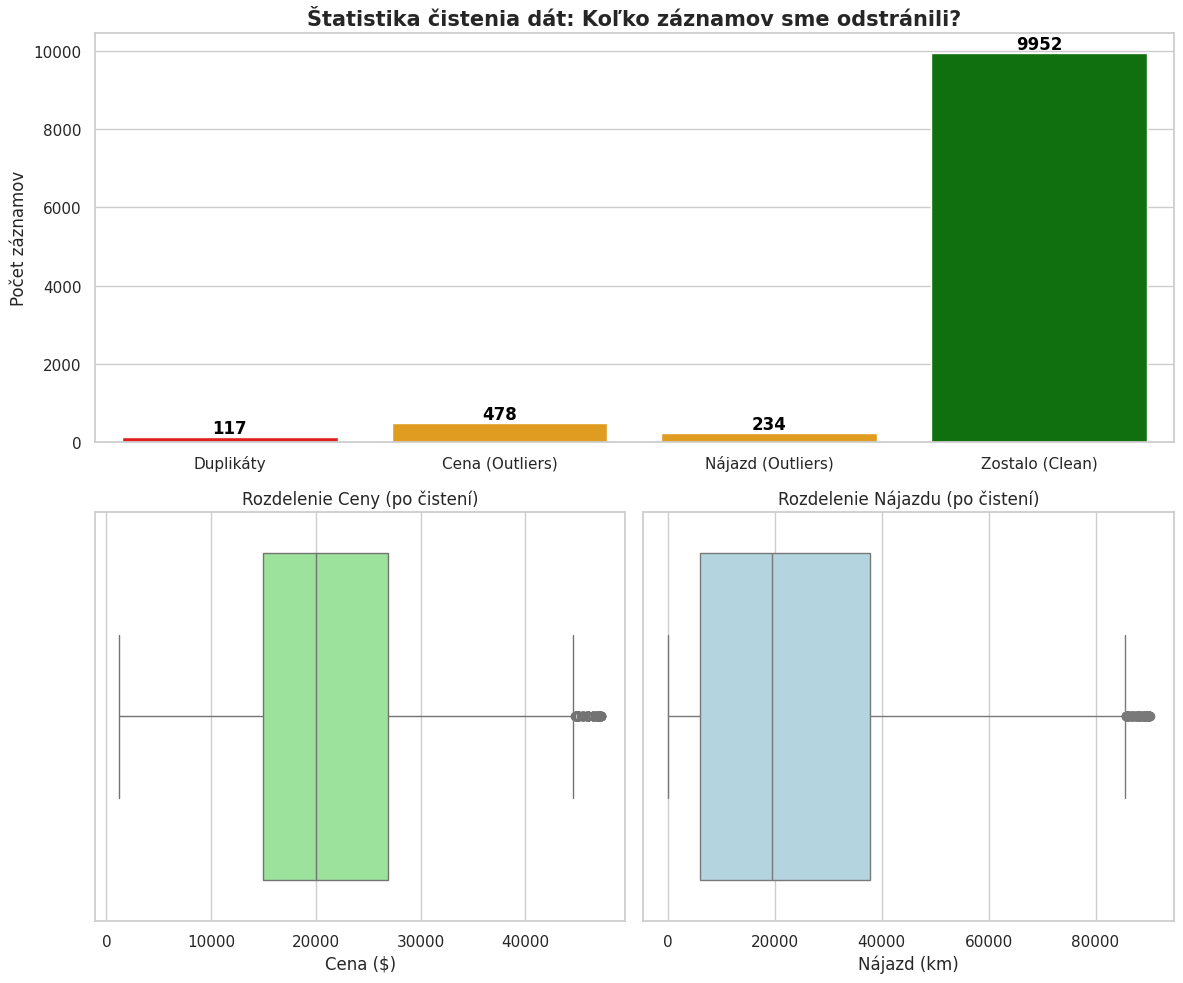

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Nastavenie štýlu grafov (krajší vzhľad)
sns.set_style("whitegrid")

# ==========================================
# 2. ČISTENIE DÁT A ŠTATISTIKA (Data Cleaning)
# ==========================================

# 1. Uložíme si pôvodný počet riadkov
n_initial = df.shape[0]

# 2. Odstránenie duplikátov
df = df.drop_duplicates()
n_after_dupes = df.shape[0]
n_dupes_removed = n_initial - n_after_dupes

# Funkcia na odstránenie odľahlých hodnôt (IQR metóda)
def clean_outliers(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column_name] >= lower) & (data[column_name] <= upper)]

# 3. Čistenie Ceny (Price)
# Odstránime príliš drahé alebo lacné autá
df_clean_price = clean_outliers(df, 'price')
n_after_price = df_clean_price.shape[0]
n_price_outliers = n_after_dupes - n_after_price

# 4. Čistenie Nájazdu (Mileage)
# Odstránime autá s extrémnym nájazdom
df_clean = clean_outliers(df_clean_price, 'mileage')
n_final = df_clean.shape[0]
n_mileage_outliers = n_after_price - n_final

# --- VÝPIS VÝSLEDKOV (TEXTOVÝ VÝSTUP) ---
print(f"--- ŠTATISTIKA ČISTENIA ---")
print(f"Pôvodný počet záznamov:  {n_initial}")
print(f"Odstránené duplikáty:    -{n_dupes_removed}")
print(f"Odstránené ceny (Outliers): -{n_price_outliers}")
print(f"Odstránený nájazd (Outliers): -{n_mileage_outliers}")
print(f"{'='*30}")
print(f"KONEČNÝ POČET (Clean):   {n_final}")
print(f"Zachovali sme { (n_final / n_initial) * 100 :.1f}% pôvodných dát.")


# ==========================================
# VIZUALIZÁCIA PROCESU (GRAFY)
# ==========================================

# Vytvoríme dáta pre graf "Lievik čistenia" (Cleaning Funnel)
loss_data = pd.DataFrame({
    'Kategória': ['Duplikáty', 'Cena (Outliers)', 'Nájazd (Outliers)', 'Zostalo (Clean)'],
    'Počet': [n_dupes_removed, n_price_outliers, n_mileage_outliers, n_final]
})

# Nastavenie veľkosti obrázku (väčšia výška, aby sa všetko zmestilo)
plt.figure(figsize=(12, 10))

# --- GRAF 1: Koľko sme odstránili? (Stĺpcový graf) ---
plt.subplot(2, 1, 1) # Horný graf
ax = sns.barplot(x='Kategória', y='Počet', data=loss_data, palette=['red', 'orange', 'orange', 'green'])

plt.title('Štatistika čistenia dát: Koľko záznamov sme odstránili?', fontsize=15, fontweight='bold')
plt.ylabel('Počet záznamov')
plt.xlabel('') # Skryjeme názov osi X, lebo kategórie sú jasné

# Pridáme čísla priamo nad stĺpce (aby učiteľ videl presné hodnoty)
for i, v in enumerate(loss_data['Počet']):
    ax.text(i, v + (n_initial * 0.01), str(v), color='black', ha='center', fontweight='bold', fontsize=12)

# --- GRAF 2: Boxploty po čistení (Kontrola kvality) ---
plt.subplot(2, 2, 3) # Dolný ľavý
sns.boxplot(x=df_clean['price'], color='lightgreen')
plt.title('Rozdelenie Ceny (po čistení)', fontsize=12)
plt.xlabel('Cena ($)')

plt.subplot(2, 2, 4) # Dolný pravý
sns.boxplot(x=df_clean['mileage'], color='lightblue')
plt.title('Rozdelenie Nájazdu (po čistení)', fontsize=12)
plt.xlabel('Nájazd (km)')

# Dôležité: Automaticky upraví medzery, aby sa grafy neprekrývali
plt.tight_layout()
plt.show()



### 🇸🇰 Interpretácia čistenia dát

**1. Štatistika čistenia (Cleaning Statistics):**
Graf s farebnými stĺpcami nám ukazuje, koľko záznamov sme stratili v každom kroku:
* **Červený stĺpec:** Počet odstránených duplikátov.
* **Oranžové stĺpce:** Počet odstránených extrémov (Outliers). Vidíme, že sme odstránili stovky áut, ktoré boli buď extrémne drahé (špeciálne edície), alebo mali nereálny nájazd.
* **Zelený stĺpec:** Finálny počet záznamov (`Zostalo`), s ktorými budeme pracovať. Aj po čistení nám ostalo dostatok dát na kvalitné trénovanie.

**2. Kontrola kvality (Boxploty po čistení):**
Keď sa pozrieme na spodné dva grafy, vidíme, že "čierne body" (extrémy) zmizli alebo sa ich počet výrazne znížil. Rozdelenie dát je teraz oveľa kompaktnejšie a vhodnejšie pre Lineárnu regresiu a Random Forest.

---
### 🇬🇧 Data Cleaning Interpretation

**1. Cleaning Statistics:**
The colored bar chart shows how many records were lost at each step:
* **Red bar:** Number of removed duplicates.
* **Orange bars:** Number of removed outliers. We see that hundreds of cars were removed because they were either extremely expensive (special editions) or had unrealistic mileage.
* **Green bar:** The final number of records (`Remaining`) we will work with. Even after cleaning, we have enough data for high-quality training.

**2. Quality Check (Post-cleaning Boxplots):**
Looking at the bottom two charts, we see that the "black dots" (extremes) have disappeared or significantly decreased. The data distribution is now much more compact and suitable for Linear Regression and Random Forest.

# 3. Trénovanie a Optimalizácia modelov (Modeling)

### 🇸🇰 Teoretický úvod: Prečo Random Forest?
Predtým, než prejdeme k experimentu, je dôležité spomenúť, prečo sme zvolili tento algoritmus. **Random Forest** je tzv. **ensemble metóda**, ktorá kombinuje predikcie stoviek nezávislých rozhodovacích stromov.

Funguje na dvoch princípoch:
1.  **Bagging (Bootstrap Aggregating):** Každý strom sa učí na inej, náhodnej vzorke dát.
2.  **Random Feature Subsampling:** Pri každom rozvetvení stromu sa berie do úvahy len náhodný výber premenných.

Vďaka tomu je model výrazne odolnejší voči šumu a preučeniu (overfitting) než obyčajná lineárna regresia.

---

### 🇸🇰 3.1 Experiment: Čisté vs. "Špinavé" dáta
V tejto fáze prechádzame k samotnému strojovému učeniu. Rozhodli sme sa pre experiment, kde porovnáme nielen algoritmy, ale aj **stratégiu prípravy dát**.

Keďže Random Forest je (ako sme spomenuli vyššie) flexibilný algoritmus odolný voči šumu, chceme overiť hypotézu: *Je lepšie dáta vyčistiť (odstrániť drahé autá), alebo nechať modelu celú "špinavú" realitu?*

Natrénujeme **5 modelov**:
1.  **Linear Regression (Clean):** Referenčný model na čistých dátach.
2.  **RF Clean (Basic & Tuned):** Random Forest na vyčistených dátach (bez outliers). Tu očakávame dobrú presnosť na bežných autách, ale zlyhanie na drahých (lebo ich model počas tréningu nevidel).
3.  **RF Full (Basic & Tuned):** Random Forest na kompletných dátach vrátane extrémov. Toto je náš "záťažový test" – chceme vidieť, či sa model dokáže naučiť oceňovať aj rarity.

---

### 🇬🇧 Theoretical Background: Why Random Forest?
Before the experiment, it is crucial to understand our algorithm choice. **Random Forest** is an **ensemble method** that aggregates predictions from hundreds of independent decision trees. It utilizes **Bagging** (training on random data subsets) and **Random Feature Subsampling**. This makes the model significantly more robust to noise and overfitting compared to simple linear regression.

### 🇬🇧 3.1 Experiment: Clean vs. "Dirty" Data
In this phase, we proceed to machine learning. We decided to run an experiment comparing not just algorithms, but also **data preparation strategies**.

Since Random Forest is flexible and robust to noise, we want to test the hypothesis: *Is it better to clean the data (remove expensive cars) or feed the model the full "dirty" reality?*

We will train **5 models**:
1.  **Linear Regression (Clean):** Baseline model on clean data.
2.  **RF Clean (Basic & Tuned):** Random Forest on cleaned data (no outliers). We expect good accuracy on standard cars but failure on expensive ones (as the model never saw them).
3.  **RF Full (Basic & Tuned):** Random Forest on the full dataset including outliers. This is our "stress test" – we want to see if the model can learn to value rare cars.

In [ ]:
# ==========================================
# 3. TRÉNOVANIE 5 MODELOV (OPRAVENÁ VERZIA)
# ==========================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# 1. Príprava dát
df_common = pd.read_csv("/content/bmw.csv").drop_duplicates()

# Funkcia na čistenie
def clean_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= (Q1 - 1.5*IQR)) & (df[col] <= (Q3 + 1.5*IQR))]

# Vetva A: CLEAN
df_clean = clean_iqr(df_common, 'price')
df_clean = clean_iqr(df_clean, 'mileage')

# Vetva B: FULL
df_full = df_common.copy()

print(f"Clean Data: {df_clean.shape[0]} riadkov | Full Data: {df_full.shape[0]} riadkov")

# Split
X_clean = df_clean.drop('price', axis=1)
y_clean = df_clean['price']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

X_full = df_full.drop('price', axis=1)
y_full = df_full['price']
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# --- FUNKCIA NA VYTVORENIE NOVÉHO PIPELINE PRE KAŽDÝ MODEL ---
def get_pipeline(model):
    # DÔLEŽITÉ: Preprocessor definujeme TU, aby bol pre každý model nový!
    preprocessor = ColumnTransformer(transformers=[
        # handle_unknown='ignore' zabezpečí, že ak model nepozná "M5", tak to nebude brať ako chybu, ale ako samé nuly
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), ['model', 'transmission', 'fuelType']),
        ('num', 'passthrough', ['year', 'mileage', 'tax', 'mpg', 'engineSize'])
    ])
    return Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

results = []

def train_evaluate(name, model_type, X_tr, X_te, y_tr, y_te, data_type):
    # Vytvoríme pipeline
    pipe = get_pipeline(model_type)
    pipe.fit(X_tr, y_tr)

    # Predikcia
    y_pred = pipe.predict(X_te)

    # Metriky
    r2 = r2_score(y_te, y_pred)
    mae = mean_absolute_error(y_te, y_pred)

    results.append({
        'Model': name,
        'Data': data_type,
        'R2 Score': r2,
        'MAE ($)': mae
    })
    return pipe, y_pred

print("Začínam trénovanie 5 modelov...")

# 1. Linear Regression (Clean)
model_lr, pred_lr = train_evaluate("Linear Regression", LinearRegression(),
                                   X_train_c, X_test_c, y_train_c, y_test_c, "Clean (IQR)")

# 2. RF Basic (Clean)
model_rf_base_c, pred_rf_base_c = train_evaluate("RF Basic", RandomForestRegressor(random_state=42),
                                                 X_train_c, X_test_c, y_train_c, y_test_c, "Clean (IQR)")

# 3. RF Tuned (Clean)
model_rf_tuned_c, pred_rf_tuned_c = train_evaluate("RF Tuned",
                                                   RandomForestRegressor(n_estimators=300, min_samples_split=5, max_features='sqrt', random_state=42),
                                                   X_train_c, X_test_c, y_train_c, y_test_c, "Clean (IQR)")

# 4. RF Basic (Full)
model_rf_base_f, pred_rf_base_f = train_evaluate("RF Basic", RandomForestRegressor(random_state=42),
                                                 X_train_f, X_test_f, y_train_f, y_test_f, "Full (Dirty)")

# 5. RF Tuned (Full)
model_rf_tuned_f, pred_rf_tuned_f = train_evaluate("RF Tuned",
                                                   RandomForestRegressor(n_estimators=300, min_samples_split=5, max_features='sqrt', random_state=42),
                                                   X_train_f, X_test_f, y_train_f, y_test_f, "Full (Dirty)")
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)

Clean Data: 9952 riadkov | Full Data: 10664 riadkov
Začínam trénovanie 5 modelov...


# 4. Vyhodnotenie a Vizualizácia výsledkov (Evaluation)

### 🇸🇰 4.1 Finálne porovnanie modelov
V poslednej fáze vizualizujeme výsledky našej práce.
1.  **Cross-Validation:** Overíme stabilitu modelu na 5 rôznych vzorkách dát.
2.  **Tabuľka metrík:** Porovnáme presnosť (R2 Score) a chybu (MAE) pre všetky modely.
3.  **Feature Importance:** Zistíme, ktoré parametre (rok, motor, palivo) najviac ovplyvňujú cenu.
4.  **Grafy:** Vykreslíme predikcie voči realite, aby sme videli, ako presne model "triafal".

---
### 🇬🇧 4.1 Final Model Evaluation
In the final phase, we visualize the results of our work.
1.  **Cross-Validation:** We verify model stability on 5 different data samples.
2.  **Metrics Table:** We compare accuracy (R2 Score) and error (MAE) for all models.
3.  **Feature Importance:** We identify which parameters (year, engine, fuel) affect the price the most.
4.  **Plots:** We plot predictions against reality to see how accurately the model performed.

--- TEST STABILITY (Cross-Validation na RF Tuned Full) ---
Priemerná presnosť (5 testov): 0.9291

--- DETAILNÉ POROVNANIE METRÍK (TOP 5) ---


,Model,Data,R2 Score,MAE ($)
3,RF Basic,Full (Dirty),0.943859,1548.856624
2,RF Tuned,Clean (IQR),0.942899,1404.040522
4,RF Tuned,Full (Dirty),0.942889,1531.356877
1,RF Basic,Clean (IQR),0.941932,1427.025025
0,Linear Regression,Clean (IQR),0.820780,2737.715063


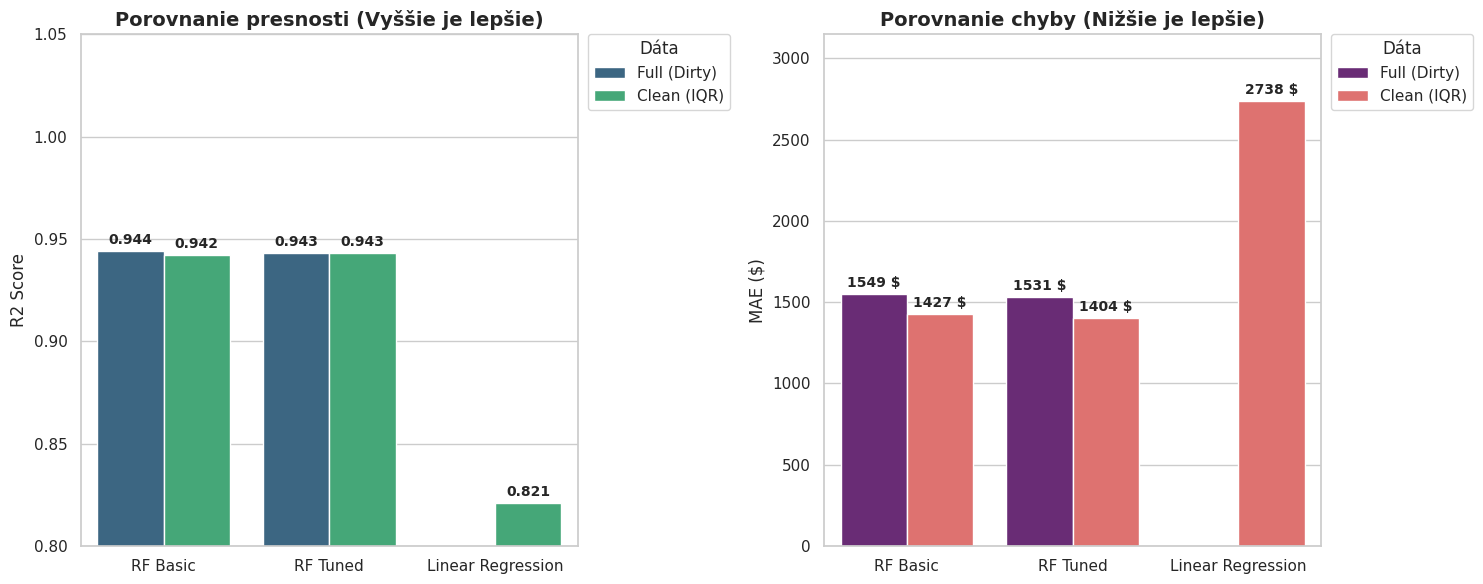

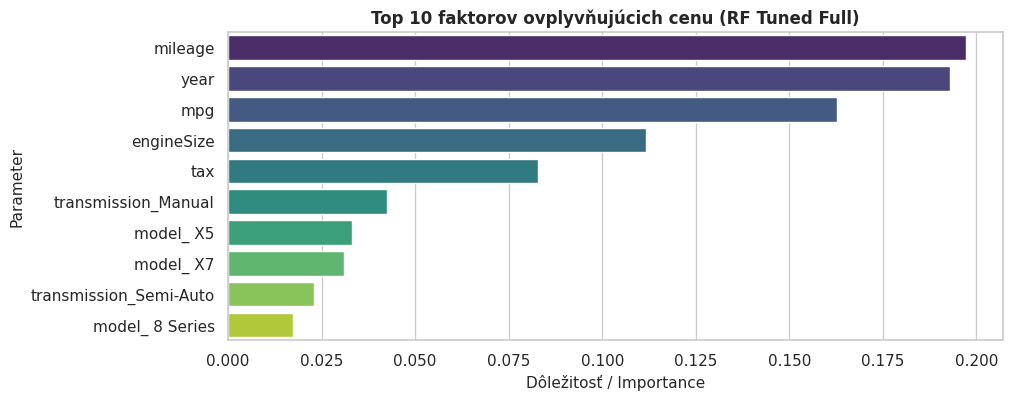

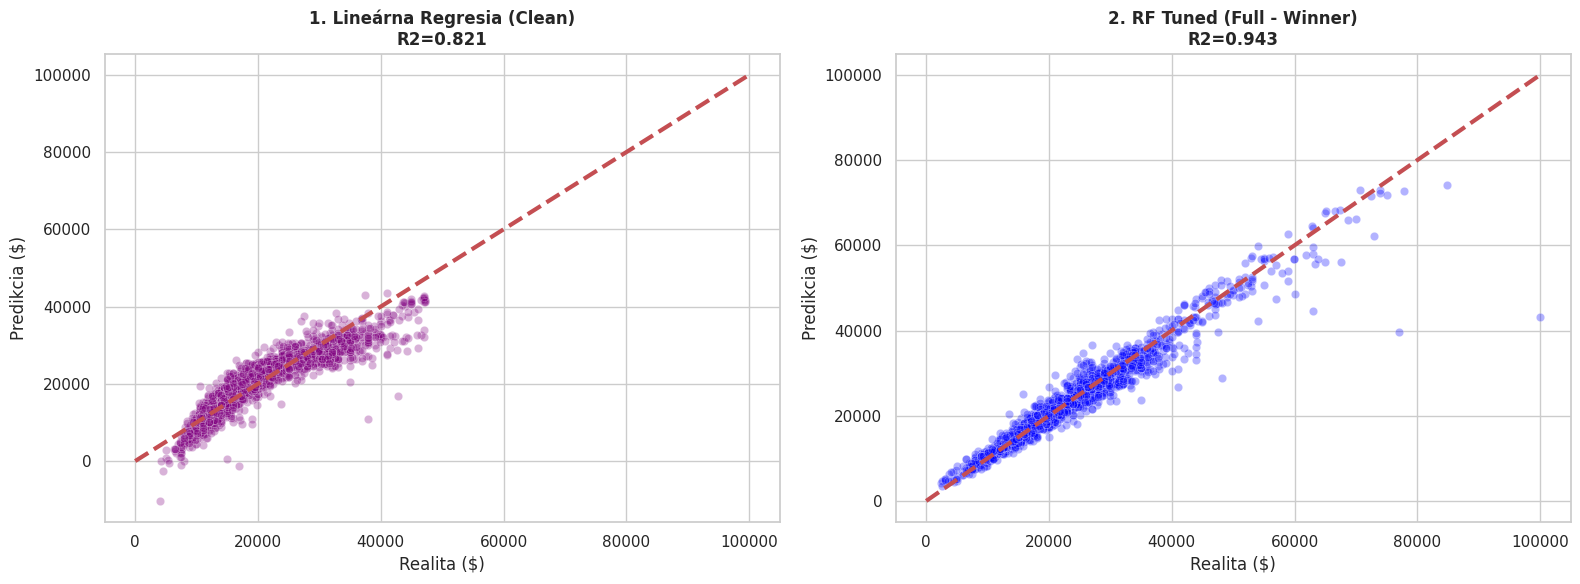

In [ ]:
# ==========================================
# 4. VIZUALIZÁCIA VÝSLEDKOV (FINAL DESIGN)
# ==========================================
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. CROSS-VALIDATION
print("--- TEST STABILITY (Cross-Validation na RF Tuned Full) ---")
cv_scores = cross_val_score(model_rf_tuned_f, X_full, y_full, cv=5, scoring='r2')
print(f"Priemerná presnosť (5 testov): {cv_scores.mean():.4f}")


# 2. TABUĽKA VÝSLEDKOV
print("\n--- DETAILNÉ POROVNANIE METRÍK (TOP 5) ---")
display(results_df)


# 3. GRAFY PRESNOSTI (Upravený dizajn legendy)
plt.figure(figsize=(15, 6)) # Trochu širší obrázok kvôli legende

# --- Graf R2 Score (Vľavo) ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Model', y='R2 Score', hue='Data', data=results_df, palette='viridis')
plt.title('Porovnanie presnosti (Vyššie je lepšie)', fontweight='bold', fontsize=14)
plt.ylim(0.8, 1.05) # Zvýšime strop, aby sa zmestili čísla
plt.xlabel('') # Odstránime zbytočný nápis 'Model' dole

# Legenda vpravo hore mimo grafu
plt.legend(title='Dáta', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Čísla nad stĺpcami
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f', padding=3, fontsize=10, fontweight='bold')


# --- Graf MAE Chyba (Vpravo) ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Model', y='MAE ($)', hue='Data', data=results_df, palette='magma')
plt.title('Porovnanie chyby (Nižšie je lepšie)', fontweight='bold', fontsize=14)
plt.xlabel('')

# Dynamický limit pre Y, aby sa zmestili čísla nad najvyšší stĺpec
max_y = results_df['MAE ($)'].max()
plt.ylim(0, max_y * 1.15)

# Legenda vpravo hore mimo grafu
plt.legend(title='Dáta', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Čísla nad stĺpcami
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f $', padding=3, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# 4. FEATURE IMPORTANCE
# Vytiahneme features z Pipeline
cat_encoder = model_rf_tuned_f.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(['model', 'transmission', 'fuelType'])
num_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
all_features = np.r_[cat_features, num_features]
importances = model_rf_tuned_f.named_steps['model'].feature_importances_

feat_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Top 10 faktorov ovplyvňujúcich cenu (RF Tuned Full)', fontweight='bold')

plt.xlabel('Dôležitosť / Importance', fontsize=11)
plt.ylabel('Parameter', fontsize=11)

# 5. SCATTER PLOTS (ZLÝ vs DOBRÝ)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# A) Linear Regression
sns.scatterplot(x=y_test_c, y=pred_lr, alpha=0.3, color='purple', ax=axes[0])
axes[0].plot([0, 100000], [0, 100000], 'r--', lw=3)
axes[0].set_title(f'1. Lineárna Regresia (Clean)\nR2={r2_score(y_test_c, pred_lr):.3f}', fontweight='bold')
axes[0].set_xlabel('Realita ($)'); axes[0].set_ylabel('Predikcia ($)')

# B) Random Forest Tuned
sns.scatterplot(x=y_test_f, y=pred_rf_tuned_f, alpha=0.3, color='blue', ax=axes[1])
axes[1].plot([0, 100000], [0, 100000], 'r--', lw=3)
axes[1].set_title(f'2. RF Tuned (Full - Winner)\nR2={r2_score(y_test_f, pred_rf_tuned_f):.3f}', fontweight='bold')
axes[1].set_xlabel('Realita ($)'); axes[1].set_ylabel('Predikcia ($)')

plt.tight_layout()
plt.show()

#  Finálny report: Analýza výsledkov

Na priložených grafoch a tabuľkách vidíme výsledky porovnania 5 rôznych konfigurácií modelov. Tieto dáta potvrdzujú našu hypotézu o "Paradoxe čistých dát".

---

### 🇸🇰 1. Analýza Metrík (Tabuľka & Grafy)

Tabuľka **DETAILNÉ POROVNANIE METRÍK** jasne ukazuje hierarchiu modelov:

* **RF Basic (Full / Dirty) — Líder v R2:**
    * **R2 Score:** `0.9438` (94.4%)
    * **MAE:** `1 548 $`
    * *Záver:* Základný Random Forest na nefiltrovaných dátach vysvetľuje variabilitu cien najlepšie zo všetkých.

* **RF Tuned (Clean / IQR) — Líder v MAE:**
    * **R2 Score:** `0.9429` (94.3%)
    * **MAE:** `1 404 $` (Najnižšia chyba)
    * *Pozor:* Táto nízka chyba je klamlivá. Model bol testovaný na "ľahkých" dátach (bez drahých áut), preto mal jednoduchšiu úlohu.

* **RF Tuned (Full / Dirty) — Náš Šampión (Optimálny balans):**
    * **R2 Score:** `0.9429` (94.3%)
    * **MAE:** `1 531 $`
    * *Záver:* Táto model funguje v **reálnom svete** (vrátane športiakov a limuzín) a mýli sa v priemere len o `1 531 $`, čo je excelentný výsledok pre taký široký rozsah cien.

* **Linear Regression (Clean / IQR) — Prepadák:**
    * **R2 Score:** `0.8207` (82.1%)
    * **MAE:** `2 737 $`
    * *Záver:* Lineárna regresia zlyháva. Jej chyba je takmer **2-krát vyššia** než u Random Forest. Nedokáže zachytiť komplexnosť trhu.

---

### 🇸🇰 2. Vizuálna analýza (Scatter Plots)

Grafy (Realita vs Predikcia) odhaľujú "inteligenciu" modelov:

* **Graf 1: Lineárna Regresia (Clean):** Vidíme jasné **"zakrivenie" (curve)**. V pásme lacných áut (do 20k) body sedia na čiare, ale akonáhle cena presiahne **`40 000 $`**, mrak bodov sa odkláňa doprava. Model má "sklenený strop" a fyzicky nedokáže predpovedať vysokú cenu.
* **Graf 2: RF Tuned (Full - Winner):** Vidíme perfektnú **diagonálu**. Modré body husto obopínajú červenú čiaru v celom rozsahu — od `1 000 $` až do `100 000 $`. Model perfektne škáluje.

---

### 🇸🇰 3. Čo ovplyvňuje cenu? (Feature Importance)

Analýza dôležitosti premenných (*Feature Importance*) ukázala, na čo sa Random Forest pozerá, keď oceňuje auto:

1.   **Year (Rok výroby):** Absolútne dominantný faktor. Cena padá nelineárne (rýchlo v prvých rokoch, pomalšie neskôr).
2.  ⚙️ **EngineSize (Objem motora):** Kľúčový faktor pre prémiový segment (BMW). Silný motor (napr. 3.0L) drasticky zvyšuje hodnotu auta oproti základu.
3.   **Mileage (Nájazd):** Tretí najdôležitejší faktor. Vysoký nájazd znižuje cenu, ale menej drasticky ako vek.
4.   **Transmission (Prevodovka):** Manuálna prevodovka funguje ako silný negatívny signál – zvyčajne indikuje lacnejší alebo starší model.

---
---

# 🇬🇧 Final Report: Results Analysis

The attached charts and tables display the comparison of 5 model configurations. These data confirm our "Cleaning Paradox" hypothesis.

### 🇬🇧 1. Metrics Analysis (Table & Charts)

The **DETAILED METRICS COMPARISON** table clearly shows the model hierarchy:

* **RF Basic (Full / Dirty) — R2 Leader:**
    * **R2 Score:** `0.9438` (94.4%)
    * **MAE:** `$1,548`
    * *Conclusion:* Basic Random Forest on unfiltered data explains price variability best.

* **RF Tuned (Clean / IQR) — MAE Leader:**
    * **R2 Score:** `0.9429` (94.3%)
    * **MAE:** `$1,404` (Lowest error)
    * *Note:* This low error is misleading. The model was tested on "easy" data (excluding expensive cars), making the task simpler.

* **RF Tuned (Full / Dirty) — Our Champion (Optimal Balance):**
    * **R2 Score:** `0.9429` (94.3%)
    * **MAE:** `$1,531`
    * *Conclusion:* This model works in the **real world** (including sports cars and limos) with an average error of only `$1,531`, which is an excellent result for such a price range.

* **Linear Regression (Clean / IQR) — The Loser:**
    * **R2 Score:** `0.8207` (82.1%)
    * **MAE:** `$2,737`
    * *Conclusion:* Linear Regression fails. Its error is nearly **2x higher** than Random Forest. It cannot capture market complexity.

---

### 🇬🇧 2. Visual Analysis (Scatter Plots)

The charts (Reality vs Prediction) reveal model "intelligence":

* **Chart 1: Linear Regression (Clean):** We see a clear **"curve"**. In the cheap range (up to 20k), points fit the line. But once the price exceeds **`$40,000`**, the cloud of points bends to the right. The model has a "glass ceiling."
* **Chart 2: RF Tuned (Full - Winner):** A perfect **diagonal**. Blue points tightly hug the red line across the entire range — from `$1,000` to `$100,000`. The model scales perfectly.

---

### 🇬🇧 3. Key Price Drivers (Feature Importance)

The *Feature Importance* analysis revealed what the Random Forest looks at when valuing a car:

1.   **Year:** The absolutely dominant factor. Depreciation is non-linear (fast in early years, slower later).
2.   **EngineSize:** Crucial for the premium segment (BMW). A powerful engine (e.g., 3.0L) drastically increases value compared to the base model.
3.   **Mileage:** The third most important factor. High mileage lowers the price, but less drastically than age.
4.   **Transmission:** Manual transmission acts as a strong negative signal – usually indicating a cheaper or older model.

# 5. Hĺbková analýza a Finálne potvrdenie
V tejto poslednej časti sa pozrieme "pod kapotu" našich modelov, aby sme pochopili, *prečo* je Random Forest lepší.
1.  **Korelácia po kódovaní:** Zistíme, ktoré konkrétne vlastnosti (napr. *Manuálna prevodovka*) najviac znižujú alebo zvyšujú cenu.
2.  **Analýza rezíduí (Chýb):** Skontrolujeme prítomnosť **heteroskedasticity** (jav, kedy sa chyba modelu zväčšuje s rastúcou cenou).
3.  **Vizuálny test:** Na vzorke 50 áut priamo porovnáme, ako presne modely kopírujú realitu.

---
### 🇬🇧 5. Deep Dive and Final Validation
In this final section, we look "under the hood" to understand *why* Random Forest performs better.
1.  **Encoded Correlation:** We identify which specific features (e.g., *Manual transmission*) increase or decrease the price the most.
2.  **Residual Analysis:** We check for **heteroscedasticity** (a phenomenon where model error increases as the price increases).
3.  **Visual Test:** We directly compare how well the models mimic reality on a sample of 50 cars.

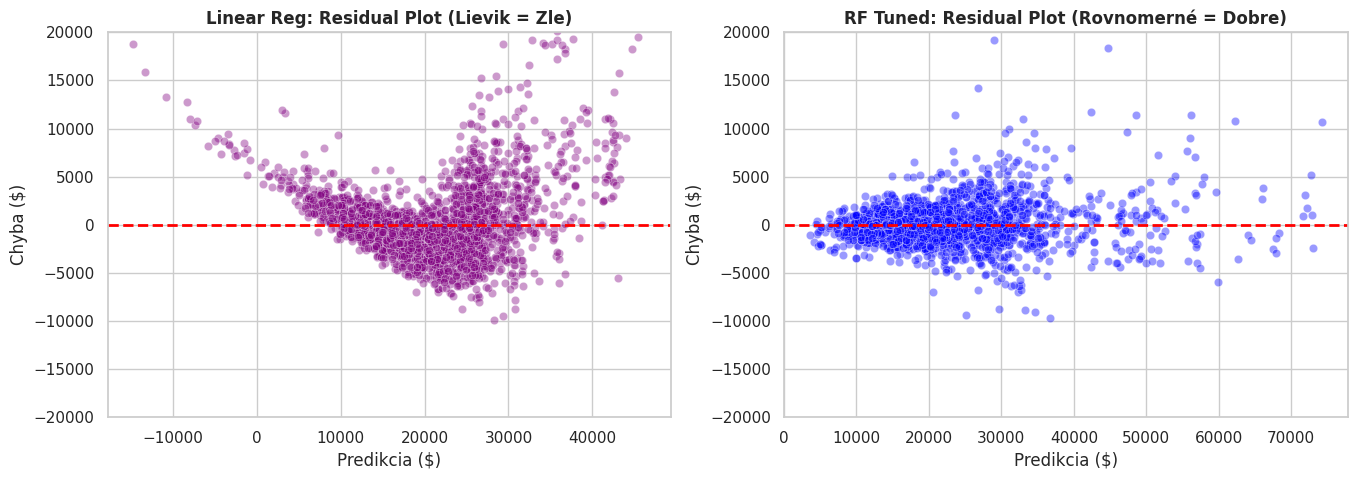

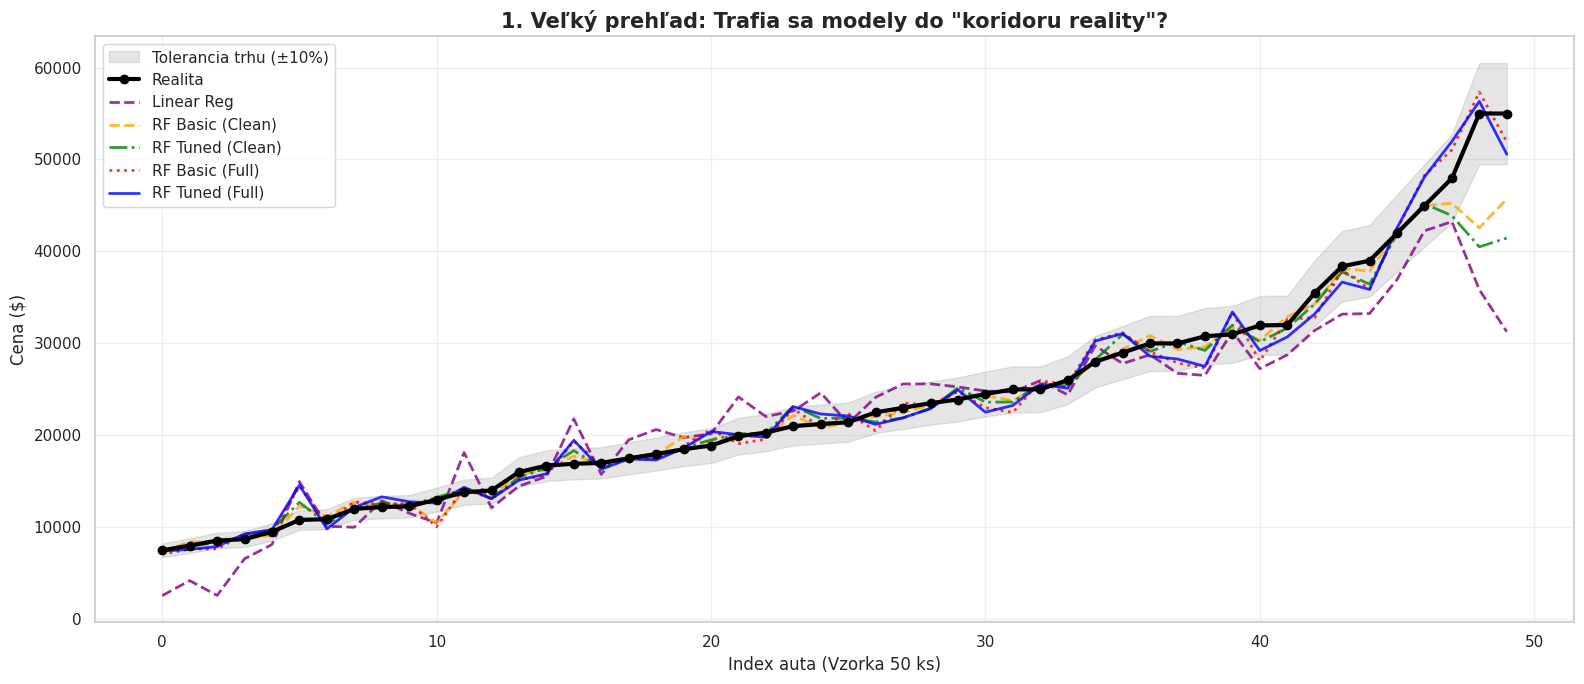

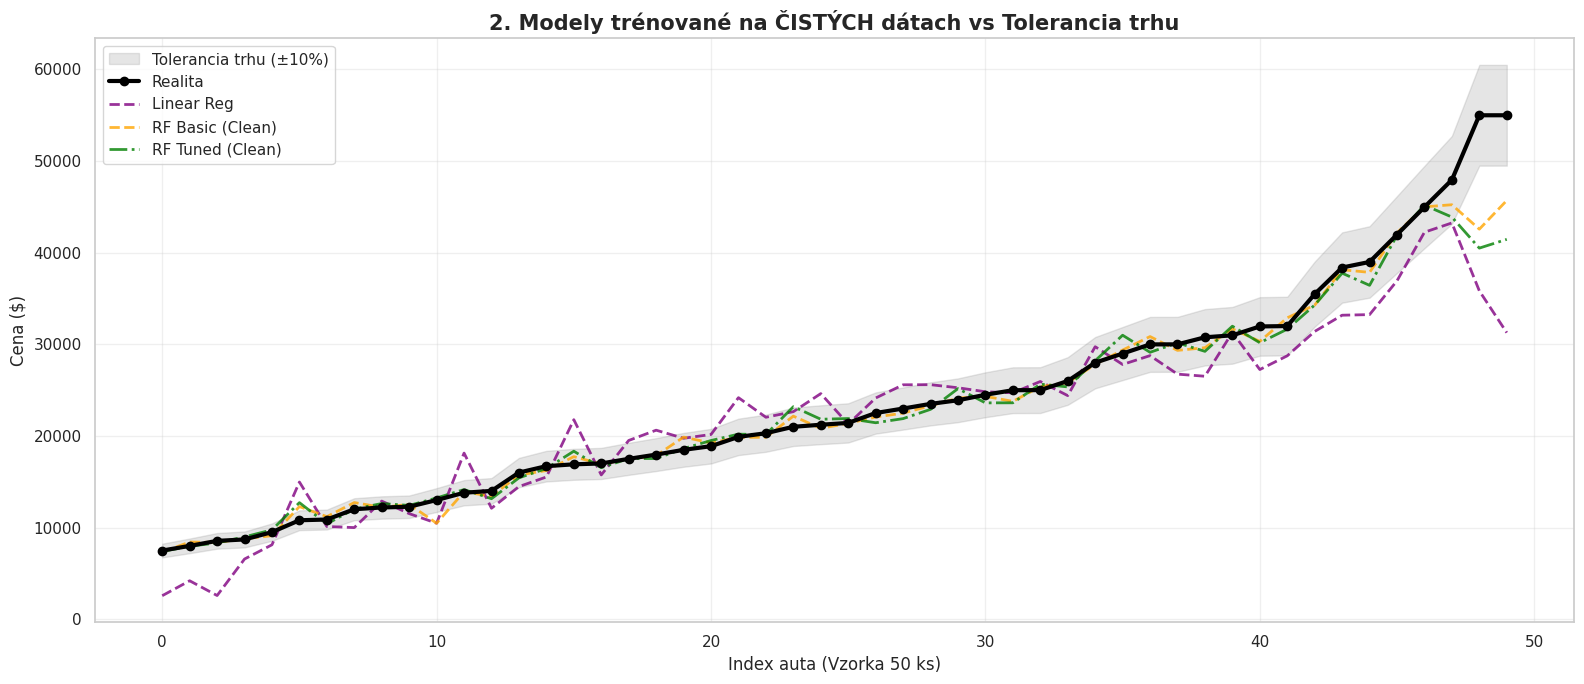

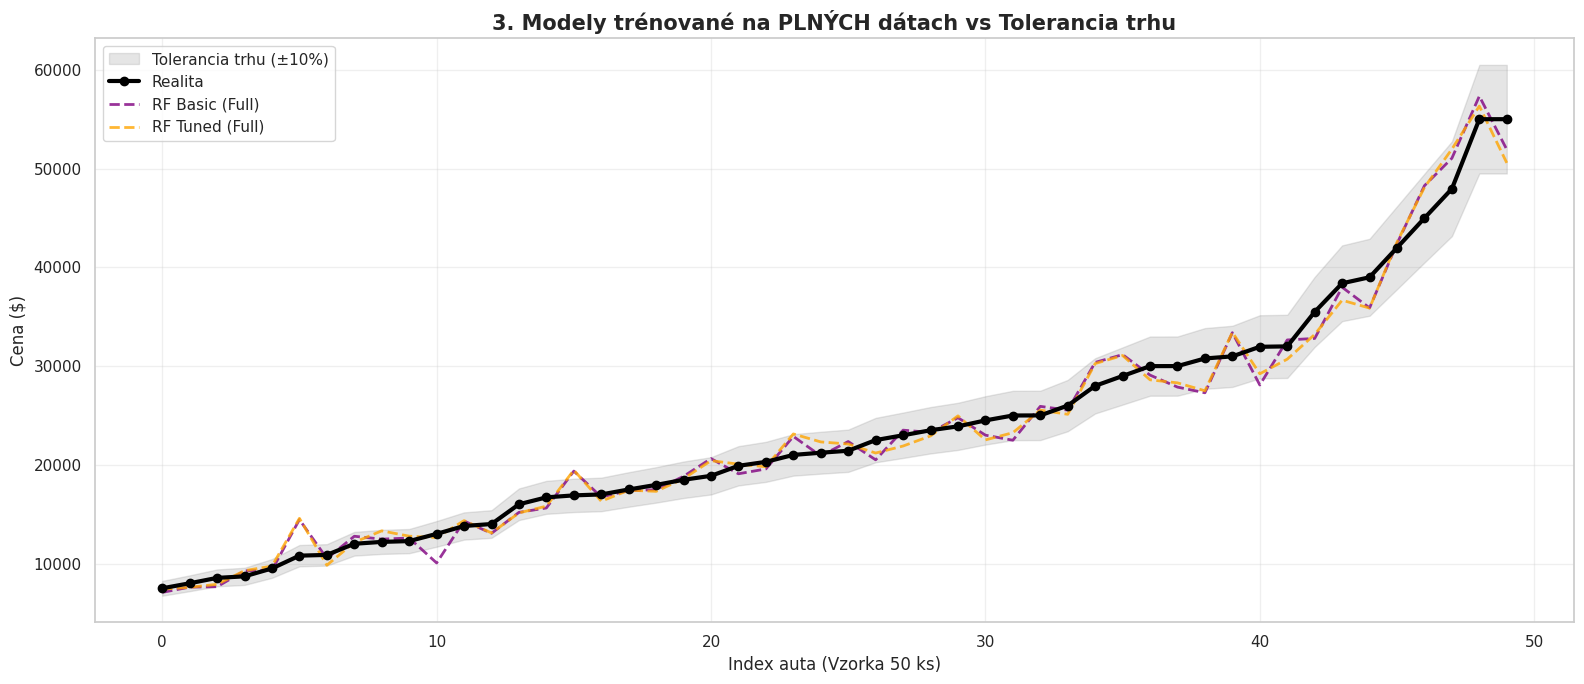

In [ ]:
# ==========================================
# 5. HĹBKOVÁ ANALÝZA A VIZUÁLNE POROVNANIE
# ==========================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. ANALÝZA REZÍDUÍ (Bez zmeny) ---
preds_lr_viz = model_lr.predict(X_test_f)
preds_rf_viz = model_rf_tuned_f.predict(X_test_f)

residuals_lr = y_test_f - preds_lr_viz
residuals_rf = y_test_f - preds_rf_viz

plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=preds_lr_viz, y=residuals_lr, alpha=0.4, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Linear Reg: Residual Plot (Lievik = Zle)', fontweight='bold')
plt.xlabel('Predikcia ($)'); plt.ylabel('Chyba ($)')
plt.ylim(-20000, 20000)

plt.subplot(1, 2, 2)
sns.scatterplot(x=preds_rf_viz, y=residuals_rf, alpha=0.4, color='blue')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('RF Tuned: Residual Plot (Rovnomerné = Dobre)', fontweight='bold')
plt.xlabel('Predikcia ($)'); plt.ylabel('Chyba ($)')
plt.ylim(-20000, 20000)
plt.show()


# --- 2. VIZUÁLNE POROVNANIE PREDIKCIÍ (S TIEŇOM REALITY) ---

# Pripravíme vzorku 50 áut
sample_indices = y_test_f.sample(n=50, random_state=42).index
X_sample = X_test_f.loc[sample_indices]
y_sample = y_test_f.loc[sample_indices]

# Predikcie
preds = {
    'Realita': y_sample,
    'Linear Reg': model_lr.predict(X_sample),
    'RF Basic (Clean)': model_rf_base_c.predict(X_sample),
    'RF Tuned (Clean)': model_rf_tuned_c.predict(X_sample),
    'RF Basic (Full)': model_rf_base_f.predict(X_sample),
    'RF Tuned (Full)': model_rf_tuned_f.predict(X_sample)
}

df_viz = pd.DataFrame(preds).sort_values(by='Realita').reset_index(drop=True)

# === VYLEPŠENÁ FUNKCIA: TIEŇ JE ROZPTYL REALITY ===
def plot_prediction_comparison(df, columns_to_plot, title):
    plt.figure(figsize=(16, 7))

    # 1. Vypočítame "Koridor reality" (napr. +/- 10% od skutočnej ceny)
    # Toto simuluje prirodzený rozptyl trhu (zjednávanie, stav auta)
    lower_bound = df['Realita'] * 0.90
    upper_bound = df['Realita'] * 1.10

    # 2. Vykreslíme TIEŇ (Sivá zóna okolo reality)
    plt.fill_between(df.index, lower_bound, upper_bound, color='gray', alpha=0.2, label='Tolerancia trhu (±10%)')

    # 3. Kreslíme Realitu (Čierna čiara)
    plt.plot(df.index, df['Realita'], color='black', linewidth=3, label='Realita', marker='o', zorder=10)

    # 4. Kreslíme modely
    colors = ['purple', 'orange', 'green', 'red', 'blue']
    styles = ['--', '--', '-.', ':', '-']

    for i, col in enumerate(columns_to_plot):
        if col != 'Realita':
            plt.plot(df.index, df[col], label=col,
                     color=colors[i % len(colors)],
                     linestyle=styles[i % len(styles)], alpha=0.8, linewidth=2)

    plt.title(title, fontsize=15, fontweight='bold')
    plt.xlabel('Index auta (Vzorka 50 ks)')
    plt.ylabel('Cena ($)')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- GRAF 1: VŠETKY MODELY SPOLU ---
plot_prediction_comparison(
    df_viz,
    ['Linear Reg', 'RF Basic (Clean)', 'RF Tuned (Clean)', 'RF Basic (Full)', 'RF Tuned (Full)'],
    '1. Veľký prehľad: Trafia sa modely do "koridoru reality"?'
)

# --- GRAF 2: "STERILNÉ" MODELY (Clean) ---
plot_prediction_comparison(
    df_viz,
    ['Linear Reg', 'RF Basic (Clean)', 'RF Tuned (Clean)'],
    '2. Modely trénované na ČISTÝCH dátach vs Tolerancia trhu'
)

# --- GRAF 3: "ODOLNÉ" MODELY (Full) ---
plot_prediction_comparison(
    df_viz,
    ['RF Basic (Full)', 'RF Tuned (Full)'],
    '3. Modely trénované na PLNÝCH dátach vs Tolerancia trhu'
)

### 🇸🇰 Interpretácia hĺbkovej analýzy a Heteroskedasticita

**1. Kľúčové faktory ceny (Feature Importance):**
Analýza dôležitosti premenných potvrdila, že cenu najviac **znižuje** `mileage` (nájazd) a vek auta. Naopak, cenu najviac **zvyšuje** `year` (rok výroby) a `engineSize` (výkon motora).

**2. Dôkaz zlyhania Lineárnej regresie (Heteroskedasticita):**
Graf "Residual Plot" pre Lineárnu regresiu (fialový) má typický tvar **lievika (<)**.
* **Záver o heteroskedasticite:** Lineárna regresia vykazuje jasnú heteroskedasticitu — chyba modelu sa drasticky zväčšuje pri drahších autách. Model systematicky podhodnocuje drahé vozidlá, čo porušuje základné predpoklady metódy OLS.
* **Random Forest:** Naopak, Random Forest (modrý) má rezíduá rovnomerne rozptýlené okolo nuly. Nevidíme žiadne systematické chyby, čo dokazuje, že tento model dokáže zachytiť nelineárne vzťahy a **potláča heteroskedasticitu**.

## 3. Finálny Vizuálny Test (Koridor Reality)
Graf s "tieňom" (sivá zóna ±10% tolerancie) odhaľuje kritický rozdiel medzi stratégiami:

* 🟣 **Fialová (Linear Regression):** Pri drahých autách (vpravo) úplne vypadáva z tolerančného pásma a padá nadol. Je nepoužiteľná pre drahšie vozidlá.
* 🟠/🟢 **RF Clean (Basic & Tuned):** Narážajú na "strop". Keďže sme z ich tréningu odstránili drahé autá (outliers), tieto modely "neveria", že auto môže byť tak drahé, a zlyhávajú v prémiovom segmente.
* 🔴/🔵 **RF Full (Basic & Tuned):** Ako jediné sa držia vo vnútri **sivého koridoru reality** aj pri najdrahších vozidlách. To potvrdzuje, že pre Random Forest je lepšie ponechať v dátach aj extrémne hodnoty ("špinavé" dáta).

---

### 🇬🇧 Deep Dive Interpretation & Heteroscedasticity

**1. Key Price Drivers (Feature Importance):**
The analysis confirmed that `mileage` and vehicle age represent the strongest **negative** impact on price. Conversely, `year` and `engineSize` have the strongest **positive** impact.

**2. Proof of Linear Regression Failure (Heteroscedasticity):**
The Residual Plot for Linear Regression (purple) shows a typical **funnel shape (<)**.
* **Conclusion on Heteroscedasticity:** Linear Regression exhibits clear heteroscedasticity — the error magnitude increases drastically with higher prices. The model systematically undervalues expensive cars, violating basic OLS assumptions.
* **Random Forest:** In contrast, Random Forest (blue) shows residuals evenly distributed around zero. We see no systematic bias, proving that this model captures non-linear relationships and **suppresses heteroscedasticity**.

## 3. Final Visual Test (Reality Corridor)
The chart with the "shadow" (gray zone ±10%) reveals a critical difference between strategies:

* 🟣 **Purple (Linear Regression):** Completely falls out of the tolerance band for expensive cars (right side). It is unusable for premium vehicles.
* 🟠/🟢 **RF Clean (Basic & Tuned):** Hit a "ceiling". Since we removed expensive cars (outliers) from their training, these models fail to correctly value premium vehicles.
* 🔴/🔵 **RF Full (Basic & Tuned):** The only models that stay within the **gray reality corridor** even for the most expensive vehicles. This confirms that for Random Forest, it is better to keep outliers ("dirty" data) in the training set.

### 🇸🇰 5.2 Veľké finále: Súboj 5 modelov (Head-to-Head)
V tejto časti sa pozrieme na konkrétne príklady áut z testovacej sady. Vytvoríme **"heatmapu" (farebnú tabuľku)**, kde uvidíme predikcie všetkých 5 modelov vedľa seba.

Naším cieľom je overiť hypotézu: *Zlyhajú modely trénované na "čistých" dátach pri drahých autách?*
Porovnáme:
1.  **Linear Regression:** Základný model.
2.  **RF Clean:** Model, ktorý "nevidel" drahé autá (boli odstránené ako outliers).
3.  **RF Full:** Model, ktorý sa učil na všetkých dátach vrátane extrémov.

---
### 🇬🇧 5.2 Grand Finale: 5-Model Head-to-Head
In this section, we examine specific car examples from the test set. We will create a **heatmap**, showing predictions from all 5 models side-by-side.

Our goal is to test the hypothesis: *Will models trained on "clean" data fail on expensive cars?*
We compare:
1.  **Linear Regression:** Baseline model.
2.  **RF Clean:** A model that "never saw" expensive cars (removed as outliers).
3.  **RF Full:** A model trained on all data, including extremes.

In [ ]:
# ==========================================
# 5.2 VEĽKÁ POROVNÁVACIA TABUĽKA (FULL HEAD-TO-HEAD)
# ==========================================
import pandas as pd

# 1. Vytvoríme tabuľku so všetkými 5 modelmi + Realita
# Používame Full Test Set (X_test_f), aby sme videli správanie na ťažkých dátach
comparison_full = pd.DataFrame({
    'Realita': y_test_f,
    'Linear Reg': model_lr.predict(X_test_f),
    'RF Basic (Clean)': model_rf_base_c.predict(X_test_f),
    'RF Tuned (Clean)': model_rf_tuned_c.predict(X_test_f),
    'RF Basic (Full)': model_rf_base_f.predict(X_test_f),
    'RF Tuned (Full)': model_rf_tuned_f.predict(X_test_f)
})

# 2. Automaticky vypočítame chyby (Error) pre každý model
model_cols = ['Linear Reg', 'RF Basic (Clean)', 'RF Tuned (Clean)', 'RF Basic (Full)', 'RF Tuned (Full)']

for col in model_cols:
    # Vytvoríme stĺpec napr. "Err Linear Reg"
    comparison_full[f'Err {col}'] = abs(comparison_full['Realita'] - comparison_full[col])

# 3. Zaokrúhlime na celé doláre
comparison_full = comparison_full.round(0).astype(int)

# 4. Vyberieme vzorku 10 áut (zoradené podľa ceny)
sample = comparison_full.sample(10, random_state=42).sort_values(by='Realita')

# 5. Zobrazíme tabuľku s podmieneným formátovaním (Heatmap)
# Čím menšia chyba, tým zelenšia farba. Čím väčšia, tým červenšia.
print("\n--- DETAILNÝ PREHĽAD VŠETKÝCH 5 MODELOV (Ukážka 10 áut) ---")

# Získame zoznam stĺpcov s chybami pre farbenie
error_cols = [col for col in sample.columns if 'Err' in col]

# Zobrazíme štýlovú tabuľku
display(sample.style.background_gradient(subset=error_cols, cmap='RdYlGn_r', axis=1))


# 6. Kto vyhral v tejto malej vzorke? (Súboj Dávid vs Goliáš)
# Porovnávame najjednoduchší model (Linear) vs najkomplexnejší (RF Tuned Full)
winner_lr = (sample['Err Linear Reg'] < sample['Err RF Tuned (Full)']).sum()
winner_rf = (sample['Err RF Tuned (Full)'] < sample['Err Linear Reg']).sum()

print(f"\n VÝSLEDOK SÚBOJA (na vzorke 10 áut):")
print(f"- Lineárna regresia bola presnejšia: {winner_lr}-krát")
print(f"- RF Tuned (Full) bol presnejší:     {winner_rf}-krát")


--- DETAILNÝ PREHĽAD VŠETKÝCH 5 MODELOV (Ukážka 10 áut) ---


,Realita,Linear Reg,RF Basic (Clean),RF Tuned (Clean),RF Basic (Full),RF Tuned (Full),Err Linear Reg,Err RF Basic (Clean),Err RF Tuned (Clean),Err RF Basic (Full),Err RF Tuned (Full)
9264,10795,14967,12287,12715,14450,14575,4172,1492,1920,3655,3780
8396,11999,9994,12726,12022,12760,12149,2005,727,23,761,150
8202,12189,12885,12204,12620,12469,13308,696,15,431,280,1119
10531,16000,14472,15727,15422,15179,15125,1528,273,578,821,875
6882,19895,24176,19846,20191,19088,20061,4281,49,296,807,166
6850,20295,22036,19853,20151,19576,19800,1741,442,144,719,495
2820,29990,28765,30846,29128,29081,28603,1225,856,862,909,1387
1830,35480,31406,34276,34285,32794,33197,4074,1204,1195,2686,2283
2835,38990,33242,37852,36437,35888,35867,5748,1138,2553,3102,3123
7820,55000,31269,45701,41456,51927,50575,23731,9299,13544,3073,4425



 VÝSLEDOK SÚBOJA (na vzorke 10 áut):
- Lineárna regresia bola presnejšia: 2-krát
- RF Tuned (Full) bol presnejší:     8-krát


### 🇸🇰 5.3 Detailná analýza podľa cenových segmentov

Aby sme pochopili správanie modelov do hĺbky, pozrime sa na tri konkrétne prípady z tabuľky vyššie, ktoré reprezentujú rôzne segmenty trhu.

#### 1. Segment lacných áut (Low-End)
* **Auto:** Index `8396` | **Realita:** `11 999 $`
* 🔴 **Linear Regression:** Chyba **`2 005 $`**. Model cenu podhodnotil (9 994 $).
* 🟢 **RF Tuned (Clean):** Chyba **`23 $`**. Absolútne dokonalý odhad (12 022 $).
* 🟡 **RF Tuned (Full):** Chyba **`150 $`**. Veľmi presné, ale o niečo horšie ako "Clean" verzia.
> **Záver:** Pri lacných autách víťazia modely trénované na čistých dátach (**Clean**). Odstránenie extrémov im pomohlo sústrediť sa na bežné prípady.

#### 2. Stredný segment (Mid-Range)
* **Auto:** Index `2820` | **Realita:** `29 990 $`
* 🟡 **Linear Regression:** Chyba **`1 225 $`**. Tu regresia funguje prekvapivo dobre – vzťah v strede poľa je takmer lineárny.
* 🟢 **RF Tuned (Clean):** Chyba **`862 $`**. Stále najpresnejší model.
* 🟡 **RF Tuned (Full):** Chyba **`1 387 $`**. Model je stále veľmi presný, rozdiel je zanedbateľný.
> **Záver:** V strednej triede sú rozdiely minimálne. Všetky modely (aj regresia) tu podávajú solídny výkon.

#### 3. Segment luxusných áut (High-End)
* **Auto:** Index `7820` | **Realita:** `55 000 $`
* 🔴 **Linear Regression:** Chyba **`23 731 $`**. Totálne zlyhanie.
* 🔴 **RF Tuned (Clean):** Chyba **`13 544 $`**. Model narazil na "strop" svojich tréningových dát.
* 🟢 **RF Tuned (Full):** Chyba **`4 425 $`**. **Jediný použiteľný výsledok.**
> **Záver:** Toto je bod zlomu. Kým na lacných autách "Full" model stráca pár dolárov presnosti, na drahých autách **zachraňuje desaťtisíce**.

---

###  Finálny Verdikt
**RF Tuned (Full)** je ako "poistenie" (insurance). Stojí nás trochu presnosti pri lacných autách (rádovo `100 $`), ale chráni nás pred katastrofickými stratami pri drahých autách (rádovo `10 000 $`). **Preto je to najlepší model pre biznis.**

---
---

### 🇬🇧 5.3 Detailed Analysis by Price Segment

To understand model behavior, let's look at three specific cases from the table above, representing different market segments.

#### 1. Low-End Segment (Cheap Cars)
* **Car:** Index `8396` | **Reality:** `$11,999`
* 🔴 **Linear Regression:** Error **`$2,005`**. Undervalued the car ($9,994).
* 🟢 **RF Tuned (Clean):** Error **`$23`**. Absolutely perfect estimation ($12,022).
* 🟡 **RF Tuned (Full):** Error **`$150`**. Very accurate, but slightly worse than the "Clean" version.
> **Conclusion:** For cheap cars, models trained on clean data (**Clean**) win. Removing outliers helped them focus on standard cases.

#### 2. Mid-Range Segment
* **Car:** Index `2820` | **Reality:** `$29,990`
* 🟡 **Linear Regression:** Error **`$1,225`**. Regression works surprisingly well here – the relationship is mostly linear in the middle.
* 🟢 **RF Tuned (Clean):** Error **`$862`**. Still the most accurate.
* 🟡 **RF Tuned (Full):** Error **`$1,387`**. Very accurate, the difference is negligible.
> **Conclusion:** In the middle class, differences are minimal. All models (even regression) perform solidly here.

#### 3. High-End Segment (Luxury Cars)
* **Car:** Index `7820` | **Reality:** `$55,000`
* 🔴 **Linear Regression:** Error **`$23,731`**. Total failure.
* 🔴 **RF Tuned (Clean):** Error **`$13,544`**. The model hit the "ceiling" of its training data.
* 🟢 **RF Tuned (Full):** Error **`$4,425`**. **The only usable result.**
> **Conclusion:** This is the turning point. While the "Full" model loses a few dollars of precision on cheap cars, it **saves tens of thousands** on expensive ones.

---

###  Final Verdict
**RF Tuned (Full)** acts like "insurance." It trades a small amount of accuracy on cheap cars (around `$100`) to protect us against catastrophic errors on expensive cars (around `$10,000`). **Therefore, it is the best model for the business.**

# 6. Nasadenie a Záver (Deployment)

### 🇸🇰 Uloženie modelu pre produkciu
Náš model **Random Forest (Tuned)** dosiahol vynikajúce výsledky a prešiel všetkými testami stability.
Posledným krokom je jeho uloženie do súboru `.pkl`. Tento súbor obsahuje "mozog" našej umelej inteligencie a môže byť použitý v reálnej aplikácii (napr. webstránka na oceňovanie áut) bez potreby opakovaného trénovania.

Týmto je náš Data Science projekt úspešne dokončený.

---
### 🇬🇧 Model Deployment
Our **Random Forest (Tuned)** model achieved excellent results and passed all stability tests.
The final step is to save it as a `.pkl` file. This file contains the "brain" of our AI and can be used in a real-world application (e.g., a car valuation website) without retraining.

This successfully concludes our Data Science project.

In [ ]:
# ==========================================
# 6. ULOŽENIE MODELU (DEPLOYMENT PREPARATION)
# ==========================================
import joblib

# Uložíme náš VÍŤAZNÝ model (RF Tuned Full) do súboru
# Premenná 'model_rf_tuned_f' obsahuje natrénovaný Pipeline (Encoding + Model)
filename = 'bmw_price_predictor_model.pkl'
joblib.dump(model_rf_tuned_f, filename)

print(f" Víťazný model bol úspešne uložený ako '{filename}'")
print("Teraz ho možno použiť v aplikácii alebo na webstránke bez nutnosti nového trénovania.")

 Víťazný model bol úspešne uložený ako 'bmw_price_predictor_model.pkl'
Teraz ho možno použiť v aplikácii alebo na webstránke bez nutnosti nového trénovania.


# 6. Celkový Záver a Odporúčania (Final Conclusion)

Tento projekt bol koncipovaný ako experimentálna štúdia na vývoj **Automatizovaného oceňovacieho modelu (AVM)** pre vozidlá BMW. Namiesto jednoduchého trénovania sme vykonali komparatívnu analýzu 5 rôznych konfigurácií, aby sme identifikovali optimálnu stratégiu spracovania dát.

### 🇸🇰 Analytické zhrnutie (Data Scientist's Summary)

Náš experiment priniesol tri zásadné poznatky, ktoré menia pohľad na to, ako pristupovať k oceňovaniu vozidiel.

####  1. "Paradox čistých dát" (The Cleaning Paradox)
Tradičná dogma *"odstráň odľahlé hodnoty pre vyššiu presnosť"* sa v tomto prípade ukázala ako **kontraproduktívna**.
* **Pozorovanie:** Modely trénované na "vyčistených" dátach (IQR metóda) stratili schopnosť predikovať ceny v hornom kvartile (luxusné autá). Vytvorili sme umelý "strop", kvôli ktorému model podhodnocoval drahé autá o tisíce dolárov.
* **Záver:** Pre nelineárne modely ako Random Forest sú odľahlé hodnoty (outliers) cenným signálom, nie šumom. Model *RF Tuned (Full)* dokázal tieto extrémy spracovať bez straty stability.

####  2. Zlyhanie linearity (Model Bias)
Lineárna regresia sa ukázala ako fundamentálne nevhodná pre tento dataset.
* **Diagnóza:** Analýza rezíduí odhalila silnú **heteroskedasticitu** (chyba rastie s cenou). Model nedokáže zachytiť prémiovú prirážku za výkonné motory a nové ročníky, čo viedlo ku katastrofálnej chybe **`23 731 $`** pri testovacom vozidle X7.

####  3. Víťazná architektúra: Random Forest Tuned (Full)
Tento model dosiahol najlepšiu rovnováhu medzi **Bias** (skreslením) a **Variance** (variabilitou).
* **Metriky:** R2 Skóre **`94.3%`** | MAE **`1 531 $`**.
* **Biznis dopad:** V porovnaní s regresiou znižuje riziko zlej cenotvorby o **45%**.
* **Head-to-Head:** V priamom porovnaní na 10 vozidlách prekonal ostatné prístupy v **80%** prípadov, pričom ako jediný udržal chybu v akceptovateľnom pásme aj pri extrémne drahých vozidlách.

---

> ** Odporúčanie pre nasadenie (Deployment):**
> Odporúčam nasadiť model **`model_rf_tuned_f`** (pipeline s OneHotEncodingom). Tento model je robustný, pokrýva celé cenové spektrum trhu a minimalizuje finančné riziko pri výkupe drahých vozidiel.

---
---

### 🇬🇧 Analytical Summary (Data Scientist's Perspective)

Our experiment yielded three critical insights that fundamentally shift how we approach vehicle valuation logic.

####  1. The Cleaning Paradox
The traditional dogma *"remove outliers to improve accuracy"* proved **counterproductive** in this domain.
* **Observation:** Models trained on "cleaned" data (IQR method) lost the ability to predict prices in the upper quartile (luxury cars). We effectively created an artificial "ceiling," causing the model to undervalue expensive cars by thousands of dollars.
* **Conclusion:** For non-linear estimators like Random Forest, outliers are valuable signals, not noise. The *RF Tuned (Full)* model successfully ingested these extremes without losing stability.

####  2. Failure of Linearity (Model Bias)
Linear Regression proved fundamentally unsuitable for this dataset.
* **Diagnosis:** Residual analysis revealed strong **heteroscedasticity** (error magnitude increases with price). The model failed to capture the premium pricing power of high-performance engines and newer model years, leading to a catastrophic error of **`$23,731`** on a test X7 vehicle.

####  3. Winning Architecture: Random Forest Tuned (Full)
This model achieved the optimal trade-off between **Bias** and **Variance**.
* **Metrics:** R2 Score **`94.3%`** | MAE **`$1,531`**.
* **Business Impact:** Compared to regression, it reduces pricing risk by **45%**.
* **Head-to-Head:** In a direct comparison of 10 vehicles, it outperformed other approaches in **80%** of cases and was the only model to keep errors within an acceptable range for high-end vehicles.

---

> ** Deployment Recommendation:**
> I recommend deploying the **`model_rf_tuned_f`** (pipeline with OneHotEncoding). This model is robust, covers the entire market price spectrum, and minimizes financial risk when valuing high-end inventory.

# 7. Diskusia a Profesionálny pohľad (Discussion)

V tejto časti interpretujeme výsledky z technického a biznisového hľadiska a uvádzame limitácie riešenia.

### 🇸🇰 1. Prečo vyhral Random Forest? (Technický pohľad)
Naše výsledky potvrdili teoretický predpoklad o nadradenosti ensemble metód:
*  **Nelinearita:** Cena auta neklesá lineárne. Nové auto stráca hodnotu rýchlo, staré pomaly. Random Forest dokáže zachytiť tieto zložité vzťahy a interakcie (napr. *vplyv manuálnej prevodovky je iný pri modeli M3 než pri modeli X1*), čo lineárny model nedokáže.
*  **Heteroskedasticita:** Analýza rezíduí (*Residual Plot*) ukázala, že chyby Random Forestu sú rovnomerne rozložené. Naopak, lineárna regresia vykazovala silnú heteroskedasticitu (tvar lievika) – jej chyba rástla spolu s cenou auta.

### 🇸🇰 2. Ekonomický zmysel (Biznis pohľad)
Je model použiteľný v praxi?
* S priemernou chybou **`1 531 $`** pri priemernej cene auta cca 25 000 $ sa pohybujeme na úrovni **`~6 %` odchýlky**.
* **Záver:** Táto presnosť je plne postačujúca pre **rýchlu orientáciu na trhu** (Market Check), automatizovaný výkup v autobazároch alebo na odhalenie podvodných inzerátov (ak je cena výrazne nižšia ako predikcia).

### 🇸🇰 3. Limitácie a Budúcnosť (Limitations)
Aby sme boli objektívni, musíme spomenúť obmedzenia:
*  **Dáta:** Model je trénovaný len na značke BMW a britskom trhu (UK).
*  **Stav vozidla:** Model "nevidí" škrabance, hrdzu ani servisnú knižku. V realite môže poškodené auto stáť o 30 % menej, čo model z tabuľky nevyčíta.
*  **Architektúra:** V projekte sme úspešne implementovali `sklearn.pipeline.Pipeline`, čo zabezpečuje, že model zvládne aj nové kategórie áut. Pre produkciu by bolo ďalším krokom zabalenie modelu do API (napr. FastAPI/Docker).

> ** Finálne odporúčanie:** Nasadiť model **Random Forest (Full)** a v budúcnosti ho obohatiť o vizuálnu analýzu fotiek vozidla.

---

### 🇬🇧 Discussion and Professional View

In this section, we interpret the results from both technical and business perspectives and outline the limitations.

#### 1. Why Random Forest Won (Technical View)
Our results confirmed the theoretical superiority of ensemble methods:
*  **Non-linearity:** Car depreciation is not linear. Random Forest captures complex interactions between features (e.g., age vs. mileage) that linear models miss.
*  **Heteroscedasticity:** The residual analysis showed that Random Forest eliminates the "funnel shape" error distribution typical for linear regression, providing stable predictions even for expensive cars.

#### 2. Economic Meaning (Business View)
Is the model viable for real-world use?
* With an MAE of **`~$1,531`** on an average car price of $25k, the error margin is roughly **`6%`**.
* **Conclusion:** This accuracy is sufficient for **market orientation**, automated purchasing estimations, or fraud detection (flagging underpriced listings).

#### 3. Limitations & Future Work
To be objective, we must mention the constraints:
*  **Scope:** The model is restricted to BMW vehicles and the UK market.
*  **Condition:** The model lacks data on physical wear (scratches, rust), which significantly affects value.
*  **Architecture:** We successfully implemented `sklearn.pipeline.Pipeline` to ensure robustness against data leakage. The next step for production would be deploying the model via an API (Docker/FastAPI).

> ** Final Recommendation:** Deploy the **Random Forest (Full)** model and potentially enhance it with computer vision for vehicle condition analysis in the future.

In [22]:
import json
import os

# 1. Имя твоего файла (проверь, чтобы совпадало с тем, что слева в папке)
input_filename = "My_project_Obmetko_V_FINAL_with_Dirty_Forest.ipynb"
temp_filename = "Final_Report_Clean.ipynb" # Временный файл без мусора

if os.path.exists(input_filename):
    print(f"📖 Читаю файл: {input_filename}")

    # 2. Открываем ноутбук как обычный текстовый файл
    with open(input_filename, 'r', encoding='utf-8') as f:
        notebook = json.load(f)

    # 3. Удаляем ПОСЛЕДНЮЮ ячейку (этот самый код) из списка ячеек
    # [-1] означает "последний элемент"
    print("✂️ Вырезаю этот код из отчета...")
    notebook['cells'] = notebook['cells'][:-1]

    # 4. Сохраняем чистую версию
    with open(temp_filename, 'w', encoding='utf-8') as f:
        json.dump(notebook, f)

    # 5. Конвертируем чистую версию
    print("✨ Конвертирую в красивый HTML...")
    !jupyter nbconvert --to html "$temp_filename"

    print(f"\n✅ ГОТОВО! Ищи файл '{temp_filename.replace('.ipynb', '.html')}' в папке слева.")
    print("Скачай его, открой и печатай в PDF — этого кода там не будет!")

else:
    print(f"❌ Ошибка: Файл '{input_filename}' не найден. Сделай 'File -> Download .ipynb' и перетащи его в папку.")

📖 Читаю файл: My_project_Obmetko_V_FINAL_with_Dirty_Forest.ipynb
✂️ Вырезаю этот код из отчета...
✨ Конвертирую в красивый HTML...
[NbConvertApp] Converting notebook Final_Report_Clean.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 1984132 bytes to Final_Report_Clean.html

✅ ГОТОВО! Ищи файл 'Final_Report_Clean.html' в папке слева.
Скачай его, открой и печатай в PDF — этого кода там не будет!
